## Prepare

In [1]:
! python3 -V

Python 3.9.13


In [ ]:
! pip install -r requirements.txt

In [ ]:
! wget -O dacapo-bench.jar https://downloads.sourceforge.net/project/dacapobench/9.12-bach-MR1/dacapo-9.12-MR1-bach.jar
! wget -O gcviewer-1.36.jar http://sourceforge.net/projects/gcviewer/files/gcviewer-1.36.jar/download
! wget -O jdk.tar.gz https://download.bell-sw.com/java/11.0.20+8/bellsoft-jdk11.0.20+8-linux-amd64.tar.gz
# MACOS
# ! wget -O jdk.tar.gz https://download.bell-sw.com/java/11.0.20.1+1/bellsoft-jdk11.0.20.1+1-macos-amd64.tar.gz
# ! wget -O jdk.zip https://download.bell-sw.com/java/11.0.20.1+1/bellsoft-jdk11.0.20.1+1-windows-amd64.zip
# ! wget https://sourceforge.net/projects/gcviewer/files/gcviewer-1.36.jar/download
! tar xzf jdk.tar.gz && rm -fv jdk.tar.gz
! java -version

In [22]:
! ./jdk-11.0.20/bin/java -jar dacapo/dacapochopin.jar -l

--------------------------------------------------------------------------------
IMPORTANT NOTICE:  This is NOT a release build of the DaCapo suite.
Since it is not an official release of the DaCapo suite, care must be taken when
using the suite, and any use of the build must be sure to note that it is not an
offical release, and should note the relevant git hash.

Feedback is greatly appreciated.   The preferred mode of feedback is via github.
Please use our github page to create an issue or a pull request.
    https://github.com/dacapobench/dacapobench.
--------------------------------------------------------------------------------

avrora batik biojava cassandra eclipse fop graphchi h2 jme jython kafka luindex lusearch pmd spring sunflow tomcat tradebeans tradesoap xalan zxing


In [10]:
!  ./jdk-11.0.20/bin/java -jar dacapo-bench.jar xalan

Using scaled threading model. 48 processors detected, 48 threads used to drive the workload, in a possible range of [1,100]
===== DaCapo 9.12-MR1 xalan starting =====
Normal completion.
===== DaCapo 9.12-MR1 xalan PASSED in 1338 msec =====


In [11]:
! ./jdk-11.0.20/bin/java -XX:+UseParallelGC -Xmx4g -Xms128m  -cp dacapo-bench.jar \
-Xlog:gc=debug:file=gc-avrora.txt -Dvmstat.enable_jfr=yes \
-Dvmstat.csv=yes Harness -v -n 5 xalan

Class name: org.dacapo.harness.Xalan
Configurations:
short     An XSLT processor for transforming XML documents
long      Xalan repeatedly transforms a set of XML documents
author    Apache Software Foundation
license   Apache License, Version 2.0
copyright Copyright (C) 1999-2003 The Apache Software Foundation
url       http://xml.apache.org/xalan-j/
version   2.7.1
sizes     default large small
Using scaled threading model. 48 processors detected, 48 threads used to drive the workload, in a possible range of [1,100]
===== DaCapo 9.12-MR1 xalan starting warmup 1 =====
Normal completion.
===== DaCapo 9.12-MR1 xalan completed warmup 1 in 1163 msec =====
===== DaCapo 9.12-MR1 xalan starting warmup 2 =====
Normal completion.
===== DaCapo 9.12-MR1 xalan completed warmup 2 in 213 msec =====
===== DaCapo 9.12-MR1 xalan starting warmup 3 =====
Normal completion.
===== DaCapo 9.12-MR1 xalan completed warmup 3 in 196 msec =====
===== DaCapo 9.12-MR1 xalan starting warmup 4 =====
Normal completi

In [ ]:
# ! pip install gym
# ! mkdir /home/ellkrauze/tmp
# ! export TMPDIR=/home/ellkrauze/tmp && pip install tensorflow
# ! export TMPDIR=/home/ellkrauze/tmp && pip install protobuf==3.20.*
# ! export TMPDIR=/home/ellkrauze/tmp && pip  install --force-reinstall -U tensorflow==2.3.0 keras keras-rl2 h5py==2.10.*


### GCViewer

In [6]:
# Download jar from http://sourceforge.net/projects/gcviewer/files/gcviewer-1.36.jar/download
! java -cp gcviewer-1.36.jar com.tagtraum.perf.gcviewer.GCViewer gc-avrora.txt summary.csv -t SUMMARY

Sep 11, 2023 1:07:56 PM com.tagtraum.perf.gcviewer.GCViewer doMain
INFO: GCViewer command line mode
Sep 11, 2023 1:07:56 PM com.tagtraum.perf.gcviewer.imp.DataReaderFacade loadModel
INFO: GCViewer version 1.36 (2019-11-30T21:36:26+0000)
Sep 11, 2023 1:07:56 PM com.tagtraum.perf.gcviewer.imp.DataReaderFactory getDataReaderBySample
INFO: File format: Oracle / OpenJDK unified jvm logging
Sep 11, 2023 1:07:56 PM com.tagtraum.perf.gcviewer.imp.DataReaderUnifiedJvmLogging read
INFO: Reading Oracle / OpenJDK unified jvm logging format...
Sep 11, 2023 1:07:56 PM com.tagtraum.perf.gcviewer.imp.DataReaderUnifiedJvmLogging lineContainsParseableEvent
INFO:  Using Parallel
Sep 11, 2023 1:07:56 PM com.tagtraum.perf.gcviewer.imp.DataReaderUnifiedJvmLogging read
INFO: Reading done.
Sep 11, 2023 1:07:56 PM com.tagtraum.perf.gcviewer.GCViewer doMain
INFO: export completed successfully


## Main

In [1]:
! python -V

Python 3.10.0


In [ ]:
! export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

import requests
import json
import logging
import warnings
import numpy as np
from typing import List
from gym.spaces import Discrete, Box
import JVMEnv, JVMEnvTest
from tqdm import tqdm 

warnings.filterwarnings(action="ignore")

# GCEasy API Key
API_KEY = "af176fbc-7be2-4fc5-8b31-5624956845c6"

# JDK used for benchmarking
TEST_JDK_PATH = "/home/ellkrauze/projects/gc-ml/jdk-11.0.20"

# DaCapo benchmark name
BM = "batik"

BM_PATH = "dacapo-bench.jar"

# Number of benchmark's iterations in total
NUM_ITER = 5

# Name of the output file (Garbage Collector logs)
GC_LOG_FILE = f"gc-{BM}.txt"

# JVM option to perform action to (increase, leave, decrease)
JVM_OPT_NAME = "MaxHeapSize"
# Maximum heap size array (from 256m to 4G)
JVM_OPT_RANGE = [np.array([268435456]), np.array([4294967296])]

"""
What to optimize: our goal in performance tuning.
This is a JSON field which is extracted from GC log file
using GCEasy API (https://blog.gceasy.io/2016/06/18/garbage-collection-log-analysis-api/).
"""
# GOAL = "throughputPercentage"
GOAL = "fullGCMaxTime"


In [ ]:
# env = JVMEnv.JVMEnv(
#     jdk = TEST_JDK_PATH, 
#     bm_path = BM_PATH,
#     jvm_opt_name = JVM_OPT_NAME,
#     jvm_opt_range = JVM_OPT_RANGE,
#     bm = BM,
#     n = NUM_ITER,
#     goal = GOAL,
#     api_key = API_KEY
# )

## Plot Xmx

In [ ]:

fullgc_values = []
minorgc_values = []
heap_values = []

for Xmx in tqdm(range(268435456, 4294967296, 100 * (2**10) * (2**10))):
    env._run(
        jvm_opts = [f"-XX:MaxHeapSize={Xmx}"], 
        gc_log_file = GC_LOG_FILE, 
        bm = BM, 
        bm_path = BM_PATH, 
        n = NUM_ITER
    )
    
    fullgc_value = env._get_goal_value(
        goal_name = "fullGCMaxTime", 
        gc_log_file = GC_LOG_FILE, 
        api_key = API_KEY
    )

    minorgc_value = env._get_goal_value(
        goal_name = "minorGCMaxTime", 
        gc_log_file = GC_LOG_FILE, 
        api_key = API_KEY
    )

    fullgc_values.append(fullgc_value)
    minorgc_values.append(minorgc_value)
    heap_values.append(Xmx)

100%|██████████| 39/39 [06:48<00:00, 10.47s/it]


100%|██████████| 39/39 [01:50<00:00,  2.83s/it]


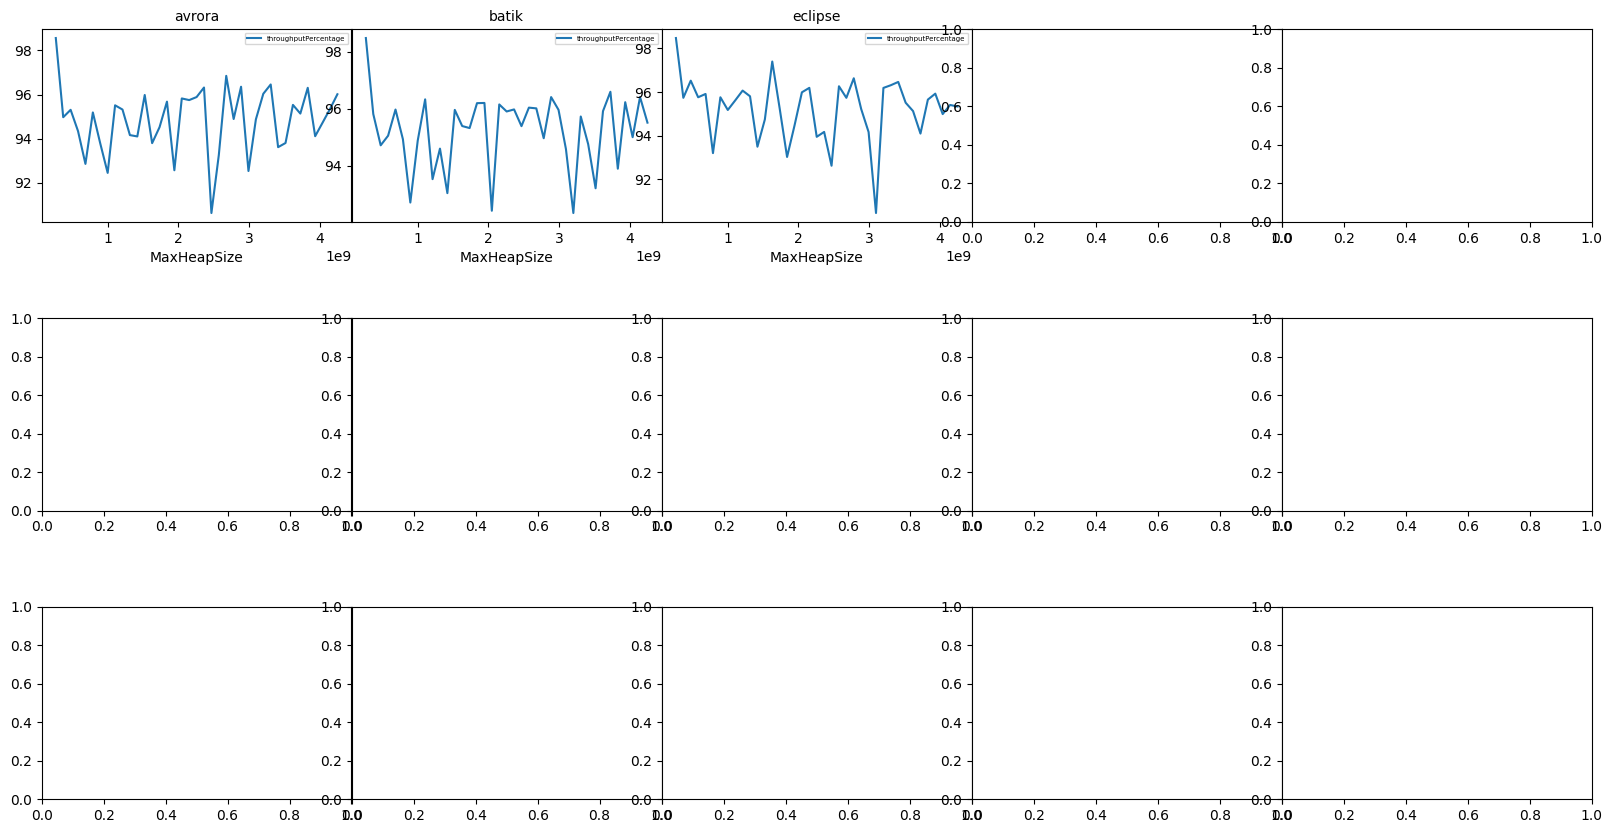

In [ ]:
def get_goal_value(goal_name: str, gc_log_file: str, api_key: str, verbose: bool=False):

    gceasy_url = f"https://api.gceasy.io/analyzeGC?apiKey={api_key}&normalizeUnits=true"
    gc_logfile = {"upload_file": open(gc_log_file, 'rb')}
    headers = {"Content-Type": "text"}

    response = requests.post(gceasy_url, files=gc_logfile, headers=headers)
    gc_info = json.loads(response.text)
    goal_value = gc_info[goal_name]

    if verbose: logging.debug(f"{goal_name} = {goal_value}")

    return float(goal_value)

bms = ["avrora","batik","eclipse", "fop", "h2", "jython", "luindex", "lusearch", "lusearch-fix", "pmd", "sunflow", "tomcat", "tradebeans", "tradesoap", "xalan"]

fig, axs = plt.subplots(3, 5, figsize=(20, 10))
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

# for i in range(len(bms)):
for i in range(3):

    # Measurements
    gc_values = []
    heap_values = []

    for Xmx in tqdm(range(268435456, 4294967296, 100 * (2**10) * (2**10))):
        env._run(
            jvm_opts = [f"-XX:MaxHeapSize={Xmx}"], 
            gc_log_file = GC_LOG_FILE, 
            bm = BM, 
            bm_path = BM_PATH, 
            n = 3
        )
        
        gc_value = get_goal_value(
            goal_name = "throughputPercentage", 
            gc_log_file = GC_LOG_FILE, 
            api_key = API_KEY
        )

        gc_values.append(gc_value)
        heap_values.append(Xmx)
    
    # Plots
    axs[i].plot(heap_values, gc_values, label='throughputPercentage')
    axs[i].legend(fontsize = 5)
    axs[i].set_xlabel(JVM_OPT_NAME, fontsize = 10)
    axs[i].set_title(bms[i], fontsize = 10)

# plt.plot(heap_values, fullgc_values, label='minorGCMaxTime')
# plt.plot(heap_values, minorgc_values, label='fullGCMaxTime')
# plt.legend()
# plt.xlabel(JVM_OPT_NAME)
# plt.title(BM)
# plt.show()

# Deep Learning Model

In [ ]:
env = JVMEnvTest.JVMEnvTest()

states = env.observation_space.shape
actions = env.action_space.n

print(states)
print(actions)

model = build_model(states, actions)
model.summary()

In [ ]:
# episodes = 3
# for episode in tqdm(range(1, episodes+1)):
#     state = env.reset()
#     done = False
#     score = 0

#     while not done:
#         env.render(mode="human")
#         action = env.action_space.sample()
#         n_state, reward, done, info = env.step(action)
#         score+=reward
#     #     print(info)
#     #     print(f"Score: {score}")
#     # print('Episode:{} Score:{}'.format(episode, score))

# Tensorflow DQN

In [ ]:
# import dill
# dill.load_session('notebook_env.db')

In [1]:
import os
import imageio
import logging
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

from tf_agents.agents.dqn import dqn_agent
from tf_agents.agents.categorical_dqn import categorical_dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import categorical_q_network, sequential
from tf_agents.policies import random_tf_policy, policy_saver
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common
from tf_agents.specs import tensor_spec
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver

# from PyEnvironments import CurveEnv, CurveMultipleEnv, JVMEnv
# from PyEnvironments import JVMEnv
from PyEnvironmentsTest import JVMEnv # !!!

2023-10-13 09:48:49.324453: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-13 09:48:49.361024: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-13 09:48:49.361681: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-13 09:48:50.100082: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# JDK used for benchmarking
# TEST_JDK_PATH = "/Users/ellkrauze/projects/gc-ml/jdk-11.0.20.1.jdk"
TEST_JDK_PATH = "/home/vsakovskaya/gc-ml/jdk-11.0.20"

# DaCapo benchmark name
BM = "avrora"
BM_TEST = "kafka"
BM_PATH = "/home/vsakovskaya/gc-ml/dacapo/dacapochopin.jar"
CALLBACK_PATH = "/home/vsakovskaya/gc-ml/dacapo/DacapoCallback/DacapoChopin/VMStatCallback.java"

# =================
dataset_path = "dataset/data"
tempdir = "tmp"
checkpoint_dir = os.path.join(tempdir, 'checkpoint')
policy_dir = os.path.join(tempdir, 'policy')
# =================

env = JVMEnv(
    jdk=TEST_JDK_PATH, 
    bm_path=BM_PATH, 
    callback_path=CALLBACK_PATH,
    bm=BM, 
    verbose=True
)

train_env = tf_py_environment.TFPyEnvironment(env, isolation=True)
eval_env = tf_py_environment.TFPyEnvironment(env, isolation=True)

test_env = tf_py_environment.TFPyEnvironment(
    JVMEnv(
        jdk=TEST_JDK_PATH, 
        bm_path=BM_PATH, 
        callback_path=CALLBACK_PATH,
        bm=BM_TEST,
        verbose=True
    )
)

Successfully initialized a JVM Environment!
 JDK: /home/vsakovskaya/gc-ml/jdk-11.0.20/bin,
 Benchmark: avrora (/home/vsakovskaya/gc-ml/dacapo/dacapochopin.jar),
 Number of iterations: 5,
 Goal: avgGCPause,
 Number of JVM options: 2,
 JVM options: {'MaxTenuringThreshold': {'min': 1, 'max': 16}, 'ParallelGCThreads': {'min': 4, 'max': 24}},
 Env. default state: [list([7, 12]) 0.47],
 Env. default goal value: 0.47,

Successfully initialized a JVM Environment!
 JDK: /home/vsakovskaya/gc-ml/jdk-11.0.20/bin,
 Benchmark: kafka (/home/vsakovskaya/gc-ml/dacapo/dacapochopin.jar),
 Number of iterations: 5,
 Goal: avgGCPause,
 Number of JVM options: 2,
 JVM options: {'MaxTenuringThreshold': {'min': 1, 'max': 16}, 'ParallelGCThreads': {'min': 4, 'max': 24}},
 Env. default state: [list([7, 12]) 0.34],
 Env. default goal value: 0.34,



In [3]:
# fc_layer_params = (100, 50)
# fc_layer_params = (100, 50, 24)
fc_layer_params = (100, 75, 50)
action_tensor_spec = tensor_spec.from_spec(env.action_spec())
num_actions = action_tensor_spec.maximum - action_tensor_spec.minimum + 1

def dense_layer(num_units):
    """
    Define a helper function to create Dense layers configured 
    with the right activation and kernel initializer.
    """
    return tf.keras.layers.Dense(
        num_units,
        activation=tf.keras.activations.relu,
        kernel_initializer=tf.keras.initializers.VarianceScaling(
            scale=2.0, mode='fan_in', distribution='truncated_normal'))

# QNetwork consists of a sequence of Dense layers followed by a dense layer
# with `num_actions` units to generate one q_value per available action as
# its output.
dense_layers = [dense_layer(num_units) for num_units in fc_layer_params]
q_values_layer = tf.keras.layers.Dense(
    num_actions,
    activation=None,
    kernel_initializer=tf.keras.initializers.RandomUniform(
        minval=-0.03, maxval=0.03),
    bias_initializer=tf.keras.initializers.Constant(-0.2))
q_net = sequential.Sequential(dense_layers + [q_values_layer])

In [6]:
num_iterations = 15000 # @param {type:"integer"}

initial_collect_steps = 10000  # @param {type:"integer"} 
collect_steps_per_iteration = 1  # @param {type:"integer"}
replay_buffer_capacity = 100000  # @param {type:"integer"}
# replay_buffer_capacity = 10000

# fc_layer_params = (100,)

# batch_size = 64  # @param {type:"integer"}
batch_size = 128  # @param {type:"integer"}
# batch_size = 64  # @param {type:"integer"}
# learning_rate = 1e-3  # @param {type:"number"}
learning_rate = 1e-6
# learning_rate = 1e-7
# gamma = 0.99
gamma = 0.9999 # The discount factor determines the importance of future rewards
gradient_clipping = 1
log_interval = 200  # @param {type:"integer"}

num_atoms = 51  # @param {type:"integer"}
min_q_value = -20  # @param {type:"integer"}
max_q_value = 20  # @param {type:"integer"}
n_step_update = 10  # @param {type:"integer"}
# n_step_update = 1  # @param {type:"integer"}

target_update_period = 1000

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 100  # @param {type:"integer"}

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
train_step_counter = tf.Variable(0)
global_step = tf.compat.v1.train.get_or_create_global_step()

agent = dqn_agent.DqnAgent(
  train_env.time_step_spec(),
  train_env.action_spec(),
  q_network=q_net,
  optimizer=optimizer,
  n_step_update=n_step_update,
  td_errors_loss_fn=tf.keras.losses.MeanSquaredError(),
  epsilon_greedy=None,
  boltzmann_temperature=0.1, # !
  target_update_period=target_update_period, # ??
  gamma=gamma,
  gradient_clipping=gradient_clipping, # [-1, 1]
  train_step_counter=global_step
)


  # epsilon_greedy=0.9, # a probability of choosing a random action

agent.initialize()

random_policy = random_tf_policy.RandomTFPolicy(
  time_step_spec = train_env.time_step_spec(),
  action_spec = train_env.action_spec(),
  automatic_state_reset=True,
  clip=False
)

## Data Collection

In order to keep track of the data collected from the environment, we will use a replay buffer. It stores experience data when we collect trajectories and is consumed during training.

This replay buffer is constructed using specs describing the tensors that are to be stored, which can be obtained from the agent using `agent.collect_data_spec`.

Set up the replay buffer and the initial data collection with the random policy.

In [7]:
def collect_step(environment, policy):
    time_step = environment.current_time_step()
    action_step = policy.action(time_step)
    reward = 0
    try:
        next_time_step = environment.step(action_step.action)
        reward = next_time_step.reward
        traj = trajectory.from_transition(time_step, action_step, next_time_step)
        replay_buffer.add_batch(traj)
        trajectories.append([traj.observation, env._reward])
    except ValueError:
        pass
    return reward


def save_dataset(data, path):
    step_counter = tf.Variable(0, trainable=False)
    checkpoint_prefix = "checkpoint"
    checkpoint_args = {
        "checkpoint_interval": 50,
        "step_counter": step_counter,
        "directory": checkpoint_prefix,
        "max_to_keep": 3,
    }
    try:
        data.save(path, checkpoint_args=checkpoint_args)
    except:
        pass

def save_rb(replay_buffer, path):
    tf.train.Checkpoint(rb = replay_buffer).save(path)

def restore_rb(replay_buffer, path):
    tf.train.Checkpoint(rb = replay_buffer).restore(path)


In [8]:
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=replay_buffer_capacity)

tf_policy_saver = policy_saver.PolicySaver(agent.policy)
replay_buffer_observer = replay_buffer.add_batch

collect_dataset = True
trajectories = []

if collect_dataset:
    for _ in tqdm(range(initial_collect_steps)):
        collect_step(train_env, random_policy)
    save_rb(replay_buffer, dataset_path)
else: 
    restore_rb(replay_buffer, dataset_path+'-1')

100%|██████████| 10000/10000 [00:45<00:00, 217.50it/s]


In [9]:
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3, 
    sample_batch_size=batch_size,
    num_steps=n_step_update + 1, 
    single_deterministic_pass=False).prefetch(3)

# dataset = replay_buffer.as_dataset(
#     num_parallel_calls=3,
#     sample_batch_size=batch_size,
#     num_steps=2).prefetch(3)

iterator = iter(dataset)

Instructions for updating:
Use `tf.data.Dataset.counter(...)` instead.


Instructions for updating:
Use `tf.data.Dataset.counter(...)` instead.


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


### Visualize Dataset

In [13]:
x = []
y = []
pairs = []
rews = []
for each in trajectories:
    pairs.append(each[0].numpy()[0])
    x.append(each[0][0][0].numpy())
    y.append(each[0][0][1].numpy())
    rews.append(each[1])
    # print(each[1])

# rewards_df = pd.DataFrame(pairs, rews, columns=["MaxTenuringThreshold", "ParallelGCThreads"])
# rewards_df = rewards_df.reset_index()
# rewards_df = rewards_df.rename(columns={'index': 'reward'})

# rewards_df.sort_values(by='reward', ascending=False)

<Axes: title={'center': 'Frequency of flag pairs in a dataset'}, xlabel='MaxTenuringThreshold,ParallelGCThreads'>

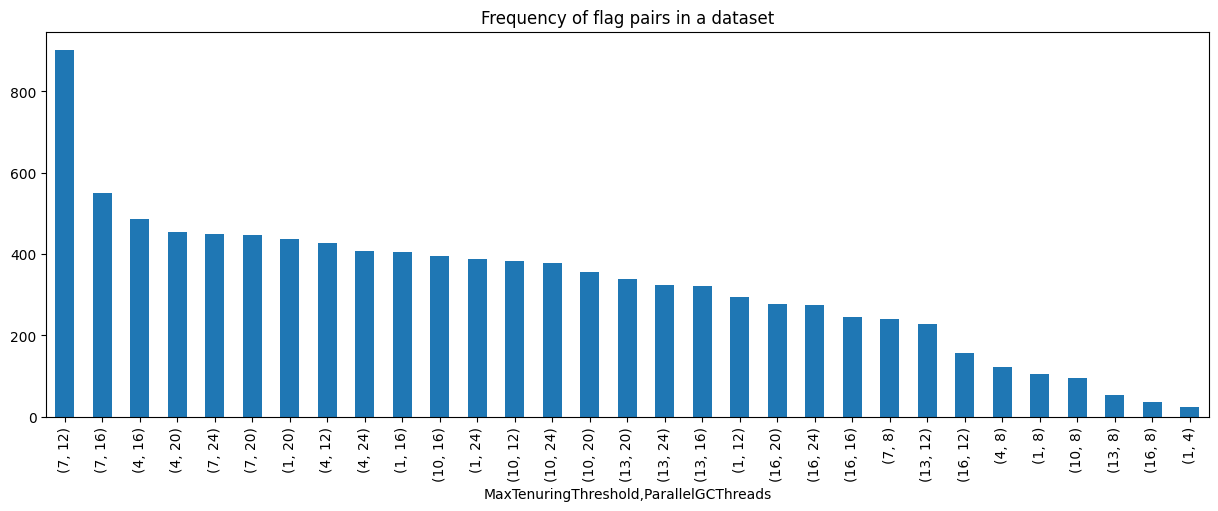

In [14]:
import pandas as pd

df = pd.DataFrame(pairs, columns=["MaxTenuringThreshold", "ParallelGCThreads"])
df.value_counts().head(100).plot(figsize=(15,5), kind='bar', title="Frequency of flag pairs in a dataset")

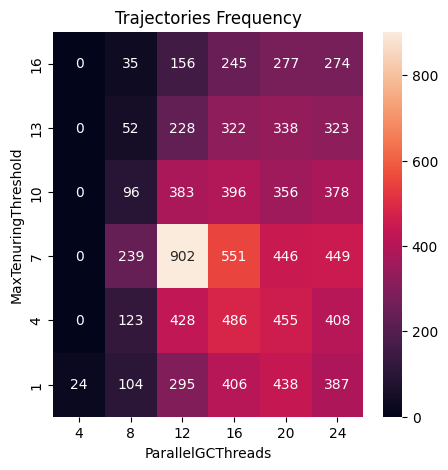

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(5, 5))
x = df.pivot_table(index='MaxTenuringThreshold',columns='ParallelGCThreads',aggfunc='size',fill_value=0)
idx = x.max(axis=1).sort_values(ascending=0).index
sns.heatmap(x, annot=True, ax=ax, fmt="")
ax.set_title("Trajectories Frequency")
ax.invert_yaxis()
plt.show()

Plot data as heatmap.

/tmp/ipykernel_43569/857763126.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_pivoted = data.pivot("MaxTenuringThreshold", "ParallelGCThreads", "Average GC Pause")


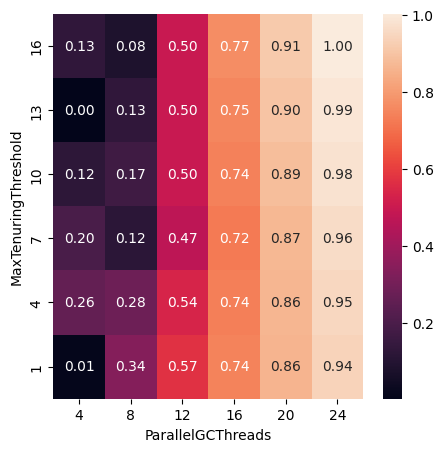

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(5, 5))
cached_states = env._perf_states
X = [cached_states[i]["args"][0] for i in cached_states.keys()]
Y = [cached_states[i]["args"][1] for i in cached_states.keys()]
Z = [cached_states[i]["goal"] for i in cached_states.keys()]

data = pd.DataFrame({'MaxTenuringThreshold': X, 'ParallelGCThreads': Y, 'Average GC Pause': Z})
data_pivoted = data.pivot("MaxTenuringThreshold", "ParallelGCThreads", "Average GC Pause")
ax = sns.heatmap(data_pivoted, annot=True, ax=ax, fmt=".2f")
ax.invert_yaxis()
plt.show()

## Agent Training

The training loop involves both collecting data from the environment and optimizing the agent's networks. Along the way, we will occasionally evaluate the agent's policy to see how we are doing.

We also need an `optimizer` to train the network we just created, and a `train_step_counter` variable to keep track of how many times the network was updated.

Note that one other significant difference from vanilla `DqnAgent` is that we now need to specify `min_q_value` and `max_q_value` as arguments. These specify the most extreme values of the support (in other words, the most extreme of the 51 atoms on either side). Make sure to choose these appropriately for your particular environment. Here we use -20 and 20.

In [10]:
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  time_step = environment.reset()
  episode_return = 0.0
  for _ in tqdm(range(num_episodes)):

    action_step = policy.action(time_step, seed=42)
    time_step = environment.step(action_step.action)
    # print(f"time_step = {time_step.observation}")
    episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]

In [11]:
agent.train = common.function(agent.train)
# Reset the train step
agent.train_step_counter.assign(0)
agent.initialize()


# Evaluate the agent's policy once before training.
# avg_return = compute_avg_return(eval_env, agent.policy, 100)
# returns = [avg_return]


loss = []
returns = []
observations = []
rewards = []
time_step = None
eval_interval = 100 
loss_interval = 100
total_return = 0.0
# time_step = None
time_step = eval_env.reset()
policy_state = agent.collect_policy.get_initial_state(train_env.batch_size)

# for _ in tqdm(range(100)):
for _ in tqdm(range(50000)):
  # Sample a batch of data from the buffer and update the agent's network.
  # time_step, _ = collect_driver.run(time_step)

  for _ in range(collect_steps_per_iteration):
    collect_step(train_env, agent.policy)

  experience, buffer_info = next(iterator)
  train_loss = agent.train(experience)

  # # Calculate a reward
  policy_step = agent.policy.action(time_step, seed=42)
  time_step = eval_env.step(policy_step.action)
  rwd = time_step.reward.numpy()[0]
  obs = time_step.observation.numpy()[0]
  total_return += rwd # Calculate a sum of rewards

  step = agent.train_step_counter.numpy()

  # Log
  # print(f"step = {step}: observation = {obs}, reward = {rwd}")
  observations.append(obs)
  rewards.append(rwd)
  
  if step % loss_interval == 0:
    print(f"step = {step}: loss = {train_loss.loss}")
    loss.append(train_loss.loss)

  if step % eval_interval == 0:
    # avg_return = compute_avg_return(eval_env, agent.policy, 10)
    avg_return = total_return / eval_interval
    print('step = {0}: Average reward = {1:.5f}'.format(step, avg_return))
    returns.append(avg_return)
    total_return = 0.0 # reset

  0%|          | 0/50000 [00:00<?, ?it/s]

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))
  0%|          | 105/50000 [00:03<16:49, 49.42it/s] 

step = 100: loss = 7.599503517150879
step = 100: Average reward = -0.33000


  0%|          | 206/50000 [00:05<16:10, 51.33it/s]

step = 200: loss = 7.994638442993164
step = 200: Average reward = -0.34000


  1%|          | 310/50000 [00:07<16:51, 49.14it/s]

step = 300: loss = 7.42820930480957
step = 300: Average reward = -0.33000


  1%|          | 409/50000 [00:09<17:30, 47.18it/s]

step = 400: loss = 6.058167457580566
step = 400: Average reward = -0.33000


  1%|          | 509/50000 [00:11<16:45, 49.23it/s]

step = 500: loss = 6.243966102600098
step = 500: Average reward = -0.34000


  1%|          | 610/50000 [00:13<15:14, 54.01it/s]

step = 600: loss = 6.646970272064209
step = 600: Average reward = -0.33000


  1%|▏         | 710/50000 [00:15<16:18, 50.36it/s]

step = 700: loss = 5.249920845031738
step = 700: Average reward = -0.33000


  2%|▏         | 807/50000 [00:17<15:59, 51.29it/s]

step = 800: loss = 5.015242099761963
step = 800: Average reward = -0.34000


  2%|▏         | 906/50000 [00:19<17:36, 46.46it/s]

step = 900: loss = 4.545398712158203
step = 900: Average reward = -0.33000


  2%|▏         | 1007/50000 [00:21<16:23, 49.82it/s]

step = 1000: loss = 4.032285690307617
step = 1000: Average reward = -0.33000


  2%|▏         | 1107/50000 [00:23<16:15, 50.12it/s]

step = 1100: loss = 3.778931140899658
step = 1100: Average reward = -0.34000


  2%|▏         | 1205/50000 [00:25<16:07, 50.41it/s]

step = 1200: loss = 4.130570411682129
step = 1200: Average reward = -0.33000


  3%|▎         | 1307/50000 [00:27<17:33, 46.23it/s]

step = 1300: loss = 3.248626470565796
step = 1300: Average reward = -0.33000


  3%|▎         | 1407/50000 [00:29<16:19, 49.61it/s]

step = 1400: loss = 3.073330879211426
step = 1400: Average reward = -0.34000


  3%|▎         | 1505/50000 [00:31<17:42, 45.64it/s]

step = 1500: loss = 3.0926403999328613
step = 1500: Average reward = -0.33000


  3%|▎         | 1607/50000 [00:33<17:57, 44.91it/s]

step = 1600: loss = 3.0480239391326904
step = 1600: Average reward = -0.33000


  3%|▎         | 1705/50000 [00:35<17:24, 46.23it/s]

step = 1700: loss = 2.5787994861602783
step = 1700: Average reward = -0.34000


  4%|▎         | 1809/50000 [00:37<14:15, 56.32it/s]

step = 1800: loss = 2.5243043899536133
step = 1800: Average reward = -0.76000


  4%|▍         | 1906/50000 [00:39<16:27, 48.72it/s]

step = 1900: loss = 2.0735814571380615
step = 1900: Average reward = -1.00000


  4%|▍         | 2007/50000 [00:41<15:24, 51.92it/s]

step = 2000: loss = 1.9013681411743164
step = 2000: Average reward = -1.00000


  4%|▍         | 2109/50000 [00:43<14:57, 53.35it/s]

step = 2100: loss = 1.635307788848877
step = 2100: Average reward = -1.00000


  4%|▍         | 2206/50000 [00:45<15:53, 50.13it/s]

step = 2200: loss = 1.4537999629974365
step = 2200: Average reward = -1.00000


  5%|▍         | 2307/50000 [00:47<15:05, 52.66it/s]

step = 2300: loss = 1.2146382331848145
step = 2300: Average reward = -1.00000


  5%|▍         | 2406/50000 [00:49<14:46, 53.69it/s]

step = 2400: loss = 1.2369282245635986
step = 2400: Average reward = -1.00000


  5%|▌         | 2508/50000 [00:51<16:05, 49.19it/s]

step = 2500: loss = 0.937963604927063
step = 2500: Average reward = -1.00000


  5%|▌         | 2608/50000 [00:53<17:13, 45.84it/s]

step = 2600: loss = 0.8926867842674255
step = 2600: Average reward = -0.98596


  5%|▌         | 2710/50000 [00:55<14:59, 52.58it/s]

step = 2700: loss = 0.7207755446434021
step = 2700: Average reward = -0.07988


  6%|▌         | 2810/50000 [00:57<15:21, 51.22it/s]

step = 2800: loss = 0.8380323052406311
step = 2800: Average reward = 0.03004


  6%|▌         | 2906/50000 [00:59<14:58, 52.43it/s]

step = 2900: loss = 0.7181098461151123
step = 2900: Average reward = 0.03004


  6%|▌         | 3007/50000 [01:01<15:16, 51.28it/s]

step = 3000: loss = 0.5059511661529541
step = 3000: Average reward = 0.03004


  6%|▌         | 3105/50000 [01:03<17:23, 44.95it/s]

step = 3100: loss = 0.4568004608154297
step = 3100: Average reward = 0.03004


  6%|▋         | 3207/50000 [01:05<15:29, 50.32it/s]

step = 3200: loss = 0.6708369851112366
step = 3200: Average reward = 0.03004


  7%|▋         | 3310/50000 [01:07<14:35, 53.33it/s]

step = 3300: loss = 0.5430657863616943
step = 3300: Average reward = 0.03004


  7%|▋         | 3406/50000 [01:09<15:48, 49.12it/s]

step = 3400: loss = 0.517945408821106
step = 3400: Average reward = 0.67443


  7%|▋         | 3506/50000 [01:11<15:37, 49.61it/s]

step = 3500: loss = 0.4151574969291687
step = 3500: Average reward = 0.74603


  7%|▋         | 3607/50000 [01:13<16:09, 47.87it/s]

step = 3600: loss = 0.3525448441505432
step = 3600: Average reward = 0.74603


  7%|▋         | 3705/50000 [01:15<14:29, 53.25it/s]

step = 3700: loss = 0.3561805188655853
step = 3700: Average reward = 0.74603


  8%|▊         | 3806/50000 [01:17<17:23, 44.28it/s]

step = 3800: loss = 0.40339064598083496
step = 3800: Average reward = 0.74603


  8%|▊         | 3908/50000 [01:19<14:41, 52.30it/s]

step = 3900: loss = 0.45510104298591614
step = 3900: Average reward = 0.74603


  8%|▊         | 4010/50000 [01:21<14:50, 51.63it/s]

step = 4000: loss = 0.32883745431900024
step = 4000: Average reward = 0.74603


  8%|▊         | 4106/50000 [01:23<17:11, 44.48it/s]

step = 4100: loss = 0.5365874767303467
step = 4100: Average reward = 0.74603


  8%|▊         | 4203/50000 [01:25<16:00, 47.68it/s]

step = 4200: loss = 0.424064040184021
step = 4200: Average reward = 0.74603


  9%|▊         | 4310/50000 [01:27<14:08, 53.87it/s]

step = 4300: loss = 0.4470706582069397
step = 4300: Average reward = 0.74603


  9%|▉         | 4410/50000 [01:29<16:09, 47.02it/s]

step = 4400: loss = 0.33087486028671265
step = 4400: Average reward = 0.74603


  9%|▉         | 4509/50000 [01:31<14:36, 51.89it/s]

step = 4500: loss = 0.36544227600097656
step = 4500: Average reward = 0.74603


  9%|▉         | 4609/50000 [01:34<15:25, 49.03it/s]

step = 4600: loss = 0.4072091579437256
step = 4600: Average reward = 0.74603


  9%|▉         | 4708/50000 [01:36<15:59, 47.20it/s]

step = 4700: loss = 0.32193461060523987
step = 4700: Average reward = 0.74603


 10%|▉         | 4806/50000 [01:38<15:24, 48.89it/s]

step = 4800: loss = 0.4477141499519348
step = 4800: Average reward = 0.74603


 10%|▉         | 4908/50000 [01:39<14:18, 52.51it/s]

step = 4900: loss = 0.34200453758239746
step = 4900: Average reward = 0.74603


 10%|█         | 5008/50000 [01:42<15:02, 49.85it/s]

step = 5000: loss = 0.3147464990615845
step = 5000: Average reward = 0.74603


 10%|█         | 5105/50000 [01:44<15:13, 49.17it/s]

step = 5100: loss = 0.3240787088871002
step = 5100: Average reward = 0.74603


 10%|█         | 5209/50000 [01:45<14:34, 51.23it/s]

step = 5200: loss = 0.30754613876342773
step = 5200: Average reward = 0.74603


 11%|█         | 5305/50000 [01:47<15:05, 49.38it/s]

step = 5300: loss = 0.3294426202774048
step = 5300: Average reward = 0.74603


 11%|█         | 5407/50000 [01:49<13:33, 54.85it/s]

step = 5400: loss = 0.28132015466690063
step = 5400: Average reward = 0.74603


 11%|█         | 5505/50000 [01:51<13:57, 53.10it/s]

step = 5500: loss = 0.2255890965461731
step = 5500: Average reward = 0.74603


 11%|█         | 5604/50000 [01:53<14:30, 50.99it/s]

step = 5600: loss = 0.2321491539478302
step = 5600: Average reward = 0.74603


 11%|█▏        | 5705/50000 [01:55<13:08, 56.17it/s]

step = 5700: loss = 0.28272077441215515
step = 5700: Average reward = 0.74603


 12%|█▏        | 5808/50000 [01:57<14:17, 51.56it/s]

step = 5800: loss = 0.28822195529937744
step = 5800: Average reward = 0.74603


 12%|█▏        | 5909/50000 [01:59<14:21, 51.19it/s]

step = 5900: loss = 0.2609707713127136
step = 5900: Average reward = 0.74603


 12%|█▏        | 6007/50000 [02:01<13:26, 54.53it/s]

step = 6000: loss = 0.36865001916885376
step = 6000: Average reward = 0.74603


 12%|█▏        | 6108/50000 [02:03<14:08, 51.72it/s]

step = 6100: loss = 0.25265172123908997
step = 6100: Average reward = 0.74603


 12%|█▏        | 6208/50000 [02:05<13:33, 53.81it/s]

step = 6200: loss = 0.35842642188072205
step = 6200: Average reward = 0.74603


 13%|█▎        | 6308/50000 [02:07<14:46, 49.31it/s]

step = 6300: loss = 0.3032422661781311
step = 6300: Average reward = 0.74603


 13%|█▎        | 6408/50000 [02:09<14:34, 49.86it/s]

step = 6400: loss = 0.2494562566280365
step = 6400: Average reward = 0.74603


 13%|█▎        | 6510/50000 [02:11<13:35, 53.31it/s]

step = 6500: loss = 0.2535061240196228
step = 6500: Average reward = 0.74603


 13%|█▎        | 6606/50000 [02:13<13:22, 54.08it/s]

step = 6600: loss = 0.23273926973342896
step = 6600: Average reward = 0.74603


 13%|█▎        | 6707/50000 [02:15<14:18, 50.44it/s]

step = 6700: loss = 0.2814701795578003
step = 6700: Average reward = 0.74603


 14%|█▎        | 6805/50000 [02:17<13:25, 53.61it/s]

step = 6800: loss = 0.27493059635162354
step = 6800: Average reward = 0.74603


 14%|█▍        | 6905/50000 [02:19<13:07, 54.75it/s]

step = 6900: loss = 0.2913702726364136
step = 6900: Average reward = 0.74603


 14%|█▍        | 7006/50000 [02:21<15:35, 45.96it/s]

step = 7000: loss = 0.19538083672523499
step = 7000: Average reward = 0.74603


 14%|█▍        | 7109/50000 [02:23<13:32, 52.82it/s]

step = 7100: loss = 0.26440444588661194
step = 7100: Average reward = 0.74603


 14%|█▍        | 7211/50000 [02:25<13:10, 54.16it/s]

step = 7200: loss = 0.2743604779243469
step = 7200: Average reward = 0.74603


 15%|█▍        | 7305/50000 [02:27<13:15, 53.66it/s]

step = 7300: loss = 0.28517889976501465
step = 7300: Average reward = 0.74603


 15%|█▍        | 7407/50000 [02:29<13:13, 53.70it/s]

step = 7400: loss = 0.253776878118515
step = 7400: Average reward = 0.74603


 15%|█▌        | 7511/50000 [02:31<12:56, 54.74it/s]

step = 7500: loss = 0.3240359425544739
step = 7500: Average reward = 0.74603


 15%|█▌        | 7608/50000 [02:33<14:29, 48.78it/s]

step = 7600: loss = 0.27151352167129517
step = 7600: Average reward = 0.74603


 15%|█▌        | 7706/50000 [02:35<15:32, 45.37it/s]

step = 7700: loss = 0.3514629006385803
step = 7700: Average reward = 0.74603


 16%|█▌        | 7809/50000 [02:37<14:53, 47.25it/s]

step = 7800: loss = 0.22813241183757782
step = 7800: Average reward = 0.74603


 16%|█▌        | 7906/50000 [02:39<13:23, 52.41it/s]

step = 7900: loss = 0.26652052998542786
step = 7900: Average reward = 0.74603


 16%|█▌        | 8008/50000 [02:41<13:15, 52.81it/s]

step = 8000: loss = 0.19098590314388275
step = 8000: Average reward = 0.74603


 16%|█▌        | 8104/50000 [02:43<13:44, 50.80it/s]

step = 8100: loss = 0.18954959511756897
step = 8100: Average reward = 0.74603


 16%|█▋        | 8207/50000 [02:45<13:54, 50.05it/s]

step = 8200: loss = 0.3359953463077545
step = 8200: Average reward = 0.74603


 17%|█▋        | 8306/50000 [02:47<12:43, 54.58it/s]

step = 8300: loss = 0.38436105847358704
step = 8300: Average reward = 0.74603


 17%|█▋        | 8408/50000 [02:49<13:09, 52.67it/s]

step = 8400: loss = 0.2658933401107788
step = 8400: Average reward = 0.74603


 17%|█▋        | 8509/50000 [02:50<12:26, 55.54it/s]

step = 8500: loss = 0.20410332083702087
step = 8500: Average reward = 0.74603


 17%|█▋        | 8605/50000 [02:52<12:56, 53.30it/s]

step = 8600: loss = 0.32415077090263367
step = 8600: Average reward = 0.74603


 17%|█▋        | 8705/50000 [02:54<14:30, 47.45it/s]

step = 8700: loss = 0.35799354314804077
step = 8700: Average reward = 0.74603


 18%|█▊        | 8806/50000 [02:56<12:34, 54.59it/s]

step = 8800: loss = 0.24831153452396393
step = 8800: Average reward = 0.74603


 18%|█▊        | 8907/50000 [02:58<13:49, 49.53it/s]

step = 8900: loss = 0.18878595530986786
step = 8900: Average reward = 0.74603


 18%|█▊        | 9008/50000 [03:00<13:05, 52.15it/s]

step = 9000: loss = 0.2639472186565399
step = 9000: Average reward = 0.74603


 18%|█▊        | 9108/50000 [03:03<12:40, 53.74it/s]

step = 9100: loss = 0.25487565994262695
step = 9100: Average reward = 0.74603


 18%|█▊        | 9208/50000 [03:04<12:59, 52.32it/s]

step = 9200: loss = 0.2637191712856293
step = 9200: Average reward = 0.74603


 19%|█▊        | 9307/50000 [03:06<13:00, 52.11it/s]

step = 9300: loss = 0.252956748008728
step = 9300: Average reward = 0.74603


 19%|█▉        | 9408/50000 [03:08<13:08, 51.45it/s]

step = 9400: loss = 0.16302545368671417
step = 9400: Average reward = 0.74603


 19%|█▉        | 9509/50000 [03:10<14:26, 46.71it/s]

step = 9500: loss = 0.2881779074668884
step = 9500: Average reward = 0.74603


 19%|█▉        | 9606/50000 [03:12<12:59, 51.79it/s]

step = 9600: loss = 0.2931191027164459
step = 9600: Average reward = 0.74603


 19%|█▉        | 9706/50000 [03:14<12:22, 54.30it/s]

step = 9700: loss = 0.2585594058036804
step = 9700: Average reward = 0.74603


 20%|█▉        | 9805/50000 [03:17<15:54, 42.10it/s]

step = 9800: loss = 0.2923431098461151
step = 9800: Average reward = 0.74603


 20%|█▉        | 9907/50000 [03:18<11:47, 56.65it/s]

step = 9900: loss = 0.2402253895998001
step = 9900: Average reward = 0.74603


 20%|██        | 10008/50000 [03:21<13:02, 51.13it/s]

step = 10000: loss = 0.2778225243091583
step = 10000: Average reward = 0.74603


 20%|██        | 10110/50000 [03:23<12:14, 54.28it/s]

step = 10100: loss = 0.27500995993614197
step = 10100: Average reward = 0.74603


 20%|██        | 10206/50000 [03:24<12:29, 53.11it/s]

step = 10200: loss = 0.29587799310684204
step = 10200: Average reward = 0.74603


 21%|██        | 10308/50000 [03:26<13:38, 48.47it/s]

step = 10300: loss = 0.24167881906032562
step = 10300: Average reward = 0.74603


 21%|██        | 10409/50000 [03:28<12:54, 51.09it/s]

step = 10400: loss = 0.28341931104660034
step = 10400: Average reward = 0.74603


 21%|██        | 10506/50000 [03:30<13:38, 48.23it/s]

step = 10500: loss = 0.1992153376340866
step = 10500: Average reward = 0.74603


 21%|██        | 10607/50000 [03:32<13:07, 50.03it/s]

step = 10600: loss = 0.21505674719810486
step = 10600: Average reward = 0.74603


 21%|██▏       | 10709/50000 [03:34<14:15, 45.94it/s]

step = 10700: loss = 0.23667404055595398
step = 10700: Average reward = 0.74603


 22%|██▏       | 10807/50000 [03:36<12:04, 54.09it/s]

step = 10800: loss = 0.22405646741390228
step = 10800: Average reward = 0.74603


 22%|██▏       | 10909/50000 [03:38<12:11, 53.43it/s]

step = 10900: loss = 0.22211170196533203
step = 10900: Average reward = 0.74603


 22%|██▏       | 11011/50000 [03:40<11:53, 54.67it/s]

step = 11000: loss = 0.20888805389404297
step = 11000: Average reward = 0.74603


 22%|██▏       | 11107/50000 [03:42<12:30, 51.85it/s]

step = 11100: loss = 0.22969283163547516
step = 11100: Average reward = 0.74603


 22%|██▏       | 11206/50000 [03:44<12:16, 52.66it/s]

step = 11200: loss = 0.166306734085083
step = 11200: Average reward = 0.74603


 23%|██▎       | 11306/50000 [03:46<11:41, 55.18it/s]

step = 11300: loss = 0.19000059366226196
step = 11300: Average reward = 0.74603


 23%|██▎       | 11405/50000 [03:48<13:26, 47.88it/s]

step = 11400: loss = 0.2080598920583725
step = 11400: Average reward = 0.74603


 23%|██▎       | 11507/50000 [03:50<12:26, 51.55it/s]

step = 11500: loss = 0.2134280651807785
step = 11500: Average reward = 0.74603


 23%|██▎       | 11609/50000 [03:52<12:29, 51.21it/s]

step = 11600: loss = 0.1978999674320221
step = 11600: Average reward = 0.74603


 23%|██▎       | 11711/50000 [03:54<12:12, 52.28it/s]

step = 11700: loss = 0.1885223388671875
step = 11700: Average reward = 0.74603


 24%|██▎       | 11807/50000 [03:56<12:43, 50.03it/s]

step = 11800: loss = 0.16926126182079315
step = 11800: Average reward = 0.74603


 24%|██▍       | 11906/50000 [03:58<13:01, 48.74it/s]

step = 11900: loss = 0.18933871388435364
step = 11900: Average reward = 0.74603


 24%|██▍       | 12008/50000 [04:00<11:55, 53.08it/s]

step = 12000: loss = 0.20241481065750122
step = 12000: Average reward = 0.74603


 24%|██▍       | 12107/50000 [04:02<11:49, 53.38it/s]

step = 12100: loss = 0.18192586302757263
step = 12100: Average reward = 0.74603


 24%|██▍       | 12209/50000 [04:04<12:17, 51.26it/s]

step = 12200: loss = 0.2384447455406189
step = 12200: Average reward = 0.74603


 25%|██▍       | 12308/50000 [04:06<12:44, 49.28it/s]

step = 12300: loss = 0.2652911841869354
step = 12300: Average reward = 0.74603


 25%|██▍       | 12404/50000 [04:08<12:16, 51.08it/s]

step = 12400: loss = 0.22804459929466248
step = 12400: Average reward = 0.74603


 25%|██▌       | 12511/50000 [04:10<11:27, 54.57it/s]

step = 12500: loss = 0.1873779594898224
step = 12500: Average reward = 0.74603


 25%|██▌       | 12610/50000 [04:12<11:36, 53.67it/s]

step = 12600: loss = 0.33263278007507324
step = 12600: Average reward = 0.74603


 25%|██▌       | 12709/50000 [04:14<11:10, 55.66it/s]

step = 12700: loss = 0.11429652571678162
step = 12700: Average reward = 0.74603


 26%|██▌       | 12805/50000 [04:16<13:15, 46.73it/s]

step = 12800: loss = 0.27201879024505615
step = 12800: Average reward = 0.74603


 26%|██▌       | 12910/50000 [04:18<11:39, 53.02it/s]

step = 12900: loss = 0.20494729280471802
step = 12900: Average reward = 0.74603


 26%|██▌       | 13006/50000 [04:19<12:14, 50.38it/s]

step = 13000: loss = 0.28290659189224243
step = 13000: Average reward = 0.74603


 26%|██▌       | 13106/50000 [04:21<12:49, 47.96it/s]

step = 13100: loss = 0.14467181265354156
step = 13100: Average reward = 0.74603


 26%|██▋       | 13206/50000 [04:23<12:00, 51.04it/s]

step = 13200: loss = 0.2608652412891388
step = 13200: Average reward = 0.74603


 27%|██▋       | 13305/50000 [04:25<12:10, 50.24it/s]

step = 13300: loss = 0.22825229167938232
step = 13300: Average reward = 0.74603


 27%|██▋       | 13409/50000 [04:28<12:16, 49.69it/s]

step = 13400: loss = 0.2361580729484558
step = 13400: Average reward = 0.74603


 27%|██▋       | 13506/50000 [04:29<11:37, 52.36it/s]

step = 13500: loss = 0.22661563754081726
step = 13500: Average reward = 0.74603


 27%|██▋       | 13609/50000 [04:32<12:43, 47.64it/s]

step = 13600: loss = 0.24139735102653503
step = 13600: Average reward = 0.74603


 27%|██▋       | 13709/50000 [04:34<12:10, 49.69it/s]

step = 13700: loss = 0.20358385145664215
step = 13700: Average reward = 0.74603


 28%|██▊       | 13806/50000 [04:36<13:11, 45.75it/s]

step = 13800: loss = 0.30916500091552734
step = 13800: Average reward = 0.74603


 28%|██▊       | 13910/50000 [04:38<11:52, 50.68it/s]

step = 13900: loss = 0.1579853892326355
step = 13900: Average reward = 0.74603


 28%|██▊       | 14005/50000 [04:40<12:06, 49.52it/s]

step = 14000: loss = 0.23517484962940216
step = 14000: Average reward = 0.74603


 28%|██▊       | 14106/50000 [04:42<11:51, 50.46it/s]

step = 14100: loss = 0.21258842945098877
step = 14100: Average reward = 0.74603


 28%|██▊       | 14206/50000 [04:44<12:19, 48.41it/s]

step = 14200: loss = 0.2310241460800171
step = 14200: Average reward = 0.74603


 29%|██▊       | 14305/50000 [04:46<11:40, 50.95it/s]

step = 14300: loss = 0.16820469498634338
step = 14300: Average reward = 0.74603


 29%|██▉       | 14408/50000 [04:48<11:13, 52.84it/s]

step = 14400: loss = 0.1614874303340912
step = 14400: Average reward = 0.74603


 29%|██▉       | 14509/50000 [04:50<11:48, 50.13it/s]

step = 14500: loss = 0.15779735147953033
step = 14500: Average reward = 0.74603


 29%|██▉       | 14605/50000 [04:52<12:39, 46.60it/s]

step = 14600: loss = 0.18468257784843445
step = 14600: Average reward = 0.74603


 29%|██▉       | 14709/50000 [04:54<12:33, 46.82it/s]

step = 14700: loss = 0.21008408069610596
step = 14700: Average reward = 0.74603


 30%|██▉       | 14806/50000 [04:56<11:21, 51.64it/s]

step = 14800: loss = 0.206612229347229
step = 14800: Average reward = 0.74603


 30%|██▉       | 14905/50000 [04:58<13:09, 44.43it/s]

step = 14900: loss = 0.278861403465271
step = 14900: Average reward = 0.74603


 30%|███       | 15006/50000 [05:00<10:52, 53.65it/s]

step = 15000: loss = 0.15785491466522217
step = 15000: Average reward = 0.74603


 30%|███       | 15108/50000 [05:02<11:22, 51.14it/s]

step = 15100: loss = 0.2055061161518097
step = 15100: Average reward = 0.74603


 30%|███       | 15210/50000 [05:04<10:28, 55.31it/s]

step = 15200: loss = 0.15053439140319824
step = 15200: Average reward = 0.74603


 31%|███       | 15309/50000 [05:06<12:15, 47.14it/s]

step = 15300: loss = 0.2078336626291275
step = 15300: Average reward = 0.74603


 31%|███       | 15409/50000 [05:08<11:01, 52.30it/s]

step = 15400: loss = 0.16929857432842255
step = 15400: Average reward = 0.74603


 31%|███       | 15506/50000 [05:10<11:44, 48.96it/s]

step = 15500: loss = 0.1675766408443451
step = 15500: Average reward = 0.74603


 31%|███       | 15608/50000 [05:12<11:31, 49.77it/s]

step = 15600: loss = 0.2128806710243225
step = 15600: Average reward = 0.74603


 31%|███▏      | 15708/50000 [05:14<11:11, 51.04it/s]

step = 15700: loss = 0.1880221962928772
step = 15700: Average reward = 0.74603


 32%|███▏      | 15805/50000 [05:16<10:53, 52.33it/s]

step = 15800: loss = 0.16214418411254883
step = 15800: Average reward = 0.74603


 32%|███▏      | 15907/50000 [05:18<11:40, 48.70it/s]

step = 15900: loss = 0.2679818272590637
step = 15900: Average reward = 0.74603


 32%|███▏      | 16005/50000 [05:20<10:52, 52.10it/s]

step = 16000: loss = 0.17388379573822021
step = 16000: Average reward = 0.74603


 32%|███▏      | 16107/50000 [05:22<11:41, 48.31it/s]

step = 16100: loss = 0.1997818797826767
step = 16100: Average reward = 0.74603


 32%|███▏      | 16209/50000 [05:24<10:15, 54.90it/s]

step = 16200: loss = 0.19260656833648682
step = 16200: Average reward = 0.74603


 33%|███▎      | 16305/50000 [05:25<11:02, 50.88it/s]

step = 16300: loss = 0.2811053395271301
step = 16300: Average reward = 0.74603


 33%|███▎      | 16407/50000 [05:27<11:08, 50.25it/s]

step = 16400: loss = 0.15236777067184448
step = 16400: Average reward = 0.74603


 33%|███▎      | 16509/50000 [05:30<11:05, 50.33it/s]

step = 16500: loss = 0.15942668914794922
step = 16500: Average reward = 0.74603


 33%|███▎      | 16605/50000 [05:31<10:25, 53.39it/s]

step = 16600: loss = 0.19230148196220398
step = 16600: Average reward = 0.74603


 33%|███▎      | 16707/50000 [05:33<10:18, 53.82it/s]

step = 16700: loss = 0.14781004190444946
step = 16700: Average reward = 0.74603


 34%|███▎      | 16805/50000 [05:35<11:33, 47.83it/s]

step = 16800: loss = 0.18730944395065308
step = 16800: Average reward = 0.74603


 34%|███▍      | 16905/50000 [05:37<10:49, 50.94it/s]

step = 16900: loss = 0.2027626633644104
step = 16900: Average reward = 0.74603


 34%|███▍      | 17005/50000 [05:39<11:35, 47.45it/s]

step = 17000: loss = 0.13337726891040802
step = 17000: Average reward = 0.74603


 34%|███▍      | 17107/50000 [05:41<10:24, 52.70it/s]

step = 17100: loss = 0.25089403986930847
step = 17100: Average reward = 0.74603


 34%|███▍      | 17209/50000 [05:43<10:45, 50.80it/s]

step = 17200: loss = 0.1981656402349472
step = 17200: Average reward = 0.74603


 35%|███▍      | 17304/50000 [05:45<10:47, 50.49it/s]

step = 17300: loss = 0.2109333574771881
step = 17300: Average reward = 0.74603


 35%|███▍      | 17410/50000 [05:47<10:11, 53.33it/s]

step = 17400: loss = 0.17682212591171265
step = 17400: Average reward = 0.74603


 35%|███▌      | 17509/50000 [05:49<11:09, 48.56it/s]

step = 17500: loss = 0.12616288661956787
step = 17500: Average reward = 0.74603


 35%|███▌      | 17609/50000 [05:51<09:34, 56.37it/s]

step = 17600: loss = 0.21361488103866577
step = 17600: Average reward = 0.74603


 35%|███▌      | 17706/50000 [05:53<10:50, 49.64it/s]

step = 17700: loss = 0.12867702543735504
step = 17700: Average reward = 0.74603


 36%|███▌      | 17810/50000 [05:55<09:56, 53.92it/s]

step = 17800: loss = 0.20047280192375183
step = 17800: Average reward = 0.74603


 36%|███▌      | 17906/50000 [05:57<10:05, 52.97it/s]

step = 17900: loss = 0.19100633263587952
step = 17900: Average reward = 0.74603


 36%|███▌      | 18006/50000 [05:59<10:23, 51.29it/s]

step = 18000: loss = 0.16534680128097534
step = 18000: Average reward = 0.74603


 36%|███▌      | 18108/50000 [06:01<10:00, 53.11it/s]

step = 18100: loss = 0.1429644227027893
step = 18100: Average reward = 0.74603


 36%|███▋      | 18209/50000 [06:03<10:00, 52.95it/s]

step = 18200: loss = 0.12241768091917038
step = 18200: Average reward = 0.74603


 37%|███▋      | 18309/50000 [06:05<10:08, 52.07it/s]

step = 18300: loss = 0.1242869570851326
step = 18300: Average reward = 0.74603


 37%|███▋      | 18408/50000 [06:07<10:32, 49.93it/s]

step = 18400: loss = 0.2277151495218277
step = 18400: Average reward = 0.74603


 37%|███▋      | 18506/50000 [06:09<10:02, 52.24it/s]

step = 18500: loss = 0.1778530776500702
step = 18500: Average reward = 0.74603


 37%|███▋      | 18608/50000 [06:11<10:26, 50.07it/s]

step = 18600: loss = 0.1449587643146515
step = 18600: Average reward = 0.74603


 37%|███▋      | 18709/50000 [06:13<09:57, 52.39it/s]

step = 18700: loss = 0.12202013283967972
step = 18700: Average reward = 0.74603


 38%|███▊      | 18805/50000 [06:15<10:05, 51.51it/s]

step = 18800: loss = 0.19640855491161346
step = 18800: Average reward = 0.74603


 38%|███▊      | 18909/50000 [06:17<10:03, 51.48it/s]

step = 18900: loss = 0.16588455438613892
step = 18900: Average reward = 0.74603


 38%|███▊      | 19007/50000 [06:19<10:54, 47.38it/s]

step = 19000: loss = 0.1251099556684494
step = 19000: Average reward = 0.74603


 38%|███▊      | 19107/50000 [06:21<09:56, 51.78it/s]

step = 19100: loss = 0.18406343460083008
step = 19100: Average reward = 0.74603


 38%|███▊      | 19209/50000 [06:23<09:17, 55.27it/s]

step = 19200: loss = 0.15673846006393433
step = 19200: Average reward = 0.74603


 39%|███▊      | 19310/50000 [06:25<10:04, 50.77it/s]

step = 19300: loss = 0.21109330654144287
step = 19300: Average reward = 0.74603


 39%|███▉      | 19409/50000 [06:27<10:49, 47.13it/s]

step = 19400: loss = 0.16153103113174438
step = 19400: Average reward = 0.74603


 39%|███▉      | 19509/50000 [06:28<09:22, 54.24it/s]

step = 19500: loss = 0.13216957449913025
step = 19500: Average reward = 0.74603


 39%|███▉      | 19604/50000 [06:30<10:14, 49.48it/s]

step = 19600: loss = 0.10276581346988678
step = 19600: Average reward = 0.74603


 39%|███▉      | 19711/50000 [06:33<09:42, 51.98it/s]

step = 19700: loss = 0.15009509027004242
step = 19700: Average reward = 0.74603


 40%|███▉      | 19809/50000 [06:35<10:19, 48.73it/s]

step = 19800: loss = 0.11135133355855942
step = 19800: Average reward = 0.74603


 40%|███▉      | 19910/50000 [06:37<10:16, 48.83it/s]

step = 19900: loss = 0.1337921917438507
step = 19900: Average reward = 0.74603


 40%|████      | 20008/50000 [06:38<09:48, 50.94it/s]

step = 20000: loss = 0.1667024791240692
step = 20000: Average reward = 0.74603


 40%|████      | 20108/50000 [06:40<09:56, 50.08it/s]

step = 20100: loss = 0.10984188318252563
step = 20100: Average reward = 0.74603


 40%|████      | 20210/50000 [06:42<09:44, 50.98it/s]

step = 20200: loss = 0.20240941643714905
step = 20200: Average reward = 0.74603


 41%|████      | 20306/50000 [06:44<10:04, 49.09it/s]

step = 20300: loss = 0.06572867929935455
step = 20300: Average reward = 0.74603


 41%|████      | 20405/50000 [06:46<10:04, 48.94it/s]

step = 20400: loss = 0.10437092185020447
step = 20400: Average reward = 0.74603


 41%|████      | 20509/50000 [06:48<09:40, 50.81it/s]

step = 20500: loss = 0.11493844538927078
step = 20500: Average reward = 0.74603


 41%|████      | 20606/50000 [06:50<10:48, 45.31it/s]

step = 20600: loss = 0.20522817969322205
step = 20600: Average reward = 0.74603


 41%|████▏     | 20709/50000 [06:52<09:59, 48.84it/s]

step = 20700: loss = 0.13036653399467468
step = 20700: Average reward = 0.74603


 42%|████▏     | 20810/50000 [06:54<09:50, 49.42it/s]

step = 20800: loss = 0.18533042073249817
step = 20800: Average reward = 0.74603


 42%|████▏     | 20906/50000 [06:56<08:48, 55.05it/s]

step = 20900: loss = 0.1236574724316597
step = 20900: Average reward = 0.74603


 42%|████▏     | 21008/50000 [06:58<08:43, 55.34it/s]

step = 21000: loss = 0.15733566880226135
step = 21000: Average reward = 0.74603


 42%|████▏     | 21105/50000 [07:00<10:38, 45.27it/s]

step = 21100: loss = 0.18770691752433777
step = 21100: Average reward = 0.74603


 42%|████▏     | 21206/50000 [07:02<09:38, 49.76it/s]

step = 21200: loss = 0.15279266238212585
step = 21200: Average reward = 0.74603


 43%|████▎     | 21302/50000 [07:04<09:15, 51.62it/s]

step = 21300: loss = 0.1733396351337433
step = 21300: Average reward = 0.74603


 43%|████▎     | 21406/50000 [07:06<09:42, 49.08it/s]

step = 21400: loss = 0.14436578750610352
step = 21400: Average reward = 0.74603


 43%|████▎     | 21507/50000 [07:08<09:07, 52.02it/s]

step = 21500: loss = 0.16919437050819397
step = 21500: Average reward = 0.74603


 43%|████▎     | 21609/50000 [07:10<10:02, 47.11it/s]

step = 21600: loss = 0.13450351357460022
step = 21600: Average reward = 0.74603


 43%|████▎     | 21705/50000 [07:12<08:58, 52.52it/s]

step = 21700: loss = 0.15024559199810028
step = 21700: Average reward = 0.74603


 44%|████▎     | 21808/50000 [07:14<09:23, 50.02it/s]

step = 21800: loss = 0.14221222698688507
step = 21800: Average reward = 0.74603


 44%|████▍     | 21908/50000 [07:16<09:17, 50.35it/s]

step = 21900: loss = 0.11959229409694672
step = 21900: Average reward = 0.74603


 44%|████▍     | 22009/50000 [07:18<09:16, 50.33it/s]

step = 22000: loss = 0.13983193039894104
step = 22000: Average reward = 0.74603


 44%|████▍     | 22111/50000 [07:21<08:41, 53.49it/s]

step = 22100: loss = 0.13636431097984314
step = 22100: Average reward = 0.74603


 44%|████▍     | 22205/50000 [07:22<08:43, 53.11it/s]

step = 22200: loss = 0.14659062027931213
step = 22200: Average reward = 0.74603


 45%|████▍     | 22308/50000 [07:24<08:31, 54.17it/s]

step = 22300: loss = 0.23070162534713745
step = 22300: Average reward = 0.74603


 45%|████▍     | 22409/50000 [07:26<08:53, 51.75it/s]

step = 22400: loss = 0.08482587337493896
step = 22400: Average reward = 0.74603


 45%|████▌     | 22507/50000 [07:28<10:03, 45.54it/s]

step = 22500: loss = 0.17746610939502716
step = 22500: Average reward = 0.74603


 45%|████▌     | 22607/50000 [07:30<08:41, 52.50it/s]

step = 22600: loss = 0.16854220628738403
step = 22600: Average reward = 0.74603


 45%|████▌     | 22708/50000 [07:32<08:40, 52.39it/s]

step = 22700: loss = 0.2297433614730835
step = 22700: Average reward = 0.74603


 46%|████▌     | 22807/50000 [07:35<09:47, 46.29it/s]

step = 22800: loss = 0.19169998168945312
step = 22800: Average reward = 0.74603


 46%|████▌     | 22907/50000 [07:37<09:25, 47.88it/s]

step = 22900: loss = 0.1711195409297943
step = 22900: Average reward = 0.74603


 46%|████▌     | 23004/50000 [07:38<07:54, 56.84it/s]

step = 23000: loss = 0.10997170209884644
step = 23000: Average reward = 0.74603


 46%|████▌     | 23106/50000 [07:40<08:14, 54.35it/s]

step = 23100: loss = 0.15172016620635986
step = 23100: Average reward = 0.74603


 46%|████▋     | 23206/50000 [07:42<08:55, 49.99it/s]

step = 23200: loss = 0.15038925409317017
step = 23200: Average reward = 0.74603


 47%|████▋     | 23303/50000 [07:44<08:39, 51.38it/s]

step = 23300: loss = 0.12794466316699982
step = 23300: Average reward = 0.74603


 47%|████▋     | 23408/50000 [07:47<08:52, 49.92it/s]

step = 23400: loss = 0.13094131648540497
step = 23400: Average reward = 0.74603


 47%|████▋     | 23508/50000 [07:49<08:25, 52.38it/s]

step = 23500: loss = 0.1515105962753296
step = 23500: Average reward = 0.74603


 47%|████▋     | 23606/50000 [07:51<09:01, 48.71it/s]

step = 23600: loss = 0.18966342508792877
step = 23600: Average reward = 0.74603


 47%|████▋     | 23705/50000 [07:53<08:47, 49.88it/s]

step = 23700: loss = 0.06892657279968262
step = 23700: Average reward = 0.74603


 48%|████▊     | 23807/50000 [07:54<08:08, 53.63it/s]

step = 23800: loss = 0.17228558659553528
step = 23800: Average reward = 0.74603


 48%|████▊     | 23906/50000 [07:57<08:39, 50.18it/s]

step = 23900: loss = 0.18388047814369202
step = 23900: Average reward = 0.74603


 48%|████▊     | 24007/50000 [07:59<08:27, 51.19it/s]

step = 24000: loss = 0.10597456246614456
step = 24000: Average reward = 0.74603


 48%|████▊     | 24107/50000 [08:01<08:35, 50.19it/s]

step = 24100: loss = 0.13009405136108398
step = 24100: Average reward = 0.74603


 48%|████▊     | 24205/50000 [08:03<09:17, 46.27it/s]

step = 24200: loss = 0.10546504706144333
step = 24200: Average reward = 0.74603


 49%|████▊     | 24309/50000 [08:05<08:12, 52.18it/s]

step = 24300: loss = 0.08668354153633118
step = 24300: Average reward = 0.74603


 49%|████▉     | 24411/50000 [08:07<08:10, 52.17it/s]

step = 24400: loss = 0.1373712420463562
step = 24400: Average reward = 0.74603


 49%|████▉     | 24506/50000 [08:08<07:22, 57.61it/s]

step = 24500: loss = 0.0932241827249527
step = 24500: Average reward = 0.74603


 49%|████▉     | 24608/50000 [08:10<08:24, 50.30it/s]

step = 24600: loss = 0.19980959594249725
step = 24600: Average reward = 0.74603


 49%|████▉     | 24709/50000 [08:12<08:29, 49.62it/s]

step = 24700: loss = 0.13656441867351532
step = 24700: Average reward = 0.74603


 50%|████▉     | 24805/50000 [08:15<12:10, 34.48it/s]

step = 24800: loss = 0.1137770414352417
step = 24800: Average reward = 0.74603


 50%|████▉     | 24911/50000 [08:19<08:38, 48.42it/s]

step = 24900: loss = 0.12638820707798004
step = 24900: Average reward = 0.74603


 50%|█████     | 25011/50000 [08:21<07:43, 53.91it/s]

step = 25000: loss = 0.09046854078769684
step = 25000: Average reward = 0.74603


 50%|█████     | 25105/50000 [08:23<08:25, 49.27it/s]

step = 25100: loss = 0.20177611708641052
step = 25100: Average reward = 0.74603


 50%|█████     | 25207/50000 [08:25<08:10, 50.55it/s]

step = 25200: loss = 0.18870201706886292
step = 25200: Average reward = 0.74603


 51%|█████     | 25311/50000 [08:27<06:59, 58.89it/s]

step = 25300: loss = 0.18225866556167603
step = 25300: Average reward = 0.74603


 51%|█████     | 25406/50000 [08:28<07:46, 52.72it/s]

step = 25400: loss = 0.13415203988552094
step = 25400: Average reward = 0.74603


 51%|█████     | 25507/50000 [08:30<07:42, 53.00it/s]

step = 25500: loss = 0.1423225998878479
step = 25500: Average reward = 0.74603


 51%|█████     | 25605/50000 [08:32<08:47, 46.25it/s]

step = 25600: loss = 0.16660791635513306
step = 25600: Average reward = 0.74603


 51%|█████▏    | 25710/50000 [08:34<08:13, 49.18it/s]

step = 25700: loss = 0.20772401988506317
step = 25700: Average reward = 0.74603


 52%|█████▏    | 25806/50000 [08:36<07:22, 54.68it/s]

step = 25800: loss = 0.14142678678035736
step = 25800: Average reward = 0.74603


 52%|█████▏    | 25908/50000 [08:38<07:50, 51.22it/s]

step = 25900: loss = 0.15115728974342346
step = 25900: Average reward = 0.74603


 52%|█████▏    | 26009/50000 [08:40<07:11, 55.64it/s]

step = 26000: loss = 0.14541611075401306
step = 26000: Average reward = 0.74603


 52%|█████▏    | 26109/50000 [08:42<07:47, 51.10it/s]

step = 26100: loss = 0.11902819573879242
step = 26100: Average reward = 0.74603


 52%|█████▏    | 26205/50000 [08:44<07:47, 50.93it/s]

step = 26200: loss = 0.09817615896463394
step = 26200: Average reward = 0.74603


 53%|█████▎    | 26307/50000 [08:46<07:23, 53.39it/s]

step = 26300: loss = 0.12134581804275513
step = 26300: Average reward = 0.74603


 53%|█████▎    | 26409/50000 [08:48<07:57, 49.38it/s]

step = 26400: loss = 0.13206931948661804
step = 26400: Average reward = 0.74603


 53%|█████▎    | 26509/50000 [08:50<07:56, 49.32it/s]

step = 26500: loss = 0.10916297882795334
step = 26500: Average reward = 0.74603


 53%|█████▎    | 26611/50000 [08:52<06:54, 56.38it/s]

step = 26600: loss = 0.09637342393398285
step = 26600: Average reward = 0.74603


 53%|█████▎    | 26706/50000 [08:54<07:04, 54.87it/s]

step = 26700: loss = 0.1594517081975937
step = 26700: Average reward = 0.74603


 54%|█████▎    | 26808/50000 [08:56<07:05, 54.53it/s]

step = 26800: loss = 0.08122963458299637
step = 26800: Average reward = 0.74603


 54%|█████▍    | 26907/50000 [08:58<07:16, 52.89it/s]

step = 26900: loss = 0.11879269033670425
step = 26900: Average reward = 0.74603


 54%|█████▍    | 27009/50000 [09:00<07:09, 53.50it/s]

step = 27000: loss = 0.09693773090839386
step = 27000: Average reward = 0.74603


 54%|█████▍    | 27105/50000 [09:02<07:04, 53.95it/s]

step = 27100: loss = 0.10772758722305298
step = 27100: Average reward = 0.74603


 54%|█████▍    | 27206/50000 [09:04<07:17, 52.13it/s]

step = 27200: loss = 0.09299974143505096
step = 27200: Average reward = 0.74603


 55%|█████▍    | 27307/50000 [09:06<07:47, 48.52it/s]

step = 27300: loss = 0.14595511555671692
step = 27300: Average reward = 0.74603


 55%|█████▍    | 27407/50000 [09:08<07:30, 50.16it/s]

step = 27400: loss = 0.203144833445549
step = 27400: Average reward = 0.74603


 55%|█████▌    | 27509/50000 [09:10<07:58, 46.99it/s]

step = 27500: loss = 0.06307527422904968
step = 27500: Average reward = 0.74603


 55%|█████▌    | 27605/50000 [09:11<07:42, 48.42it/s]

step = 27600: loss = 0.15449342131614685
step = 27600: Average reward = 0.74603


 55%|█████▌    | 27705/50000 [09:14<07:55, 46.89it/s]

step = 27700: loss = 0.11999814957380295
step = 27700: Average reward = 0.74603


 56%|█████▌    | 27807/50000 [09:16<07:08, 51.75it/s]

step = 27800: loss = 0.10355889797210693
step = 27800: Average reward = 0.74603


 56%|█████▌    | 27910/50000 [09:18<06:37, 55.56it/s]

step = 27900: loss = 0.10375884920358658
step = 27900: Average reward = 0.74603


 56%|█████▌    | 28006/50000 [09:19<06:59, 52.43it/s]

step = 28000: loss = 0.13684362173080444
step = 28000: Average reward = 0.74603


 56%|█████▌    | 28106/50000 [09:21<07:18, 49.88it/s]

step = 28100: loss = 0.13668939471244812
step = 28100: Average reward = 0.74603


 56%|█████▋    | 28208/50000 [09:23<07:12, 50.36it/s]

step = 28200: loss = 0.11182953417301178
step = 28200: Average reward = 0.74603


 57%|█████▋    | 28310/50000 [09:25<07:02, 51.37it/s]

step = 28300: loss = 0.08045421540737152
step = 28300: Average reward = 0.74603


 57%|█████▋    | 28408/50000 [09:28<07:47, 46.20it/s]

step = 28400: loss = 0.1502358615398407
step = 28400: Average reward = 0.74603


 57%|█████▋    | 28505/50000 [09:29<07:36, 47.11it/s]

step = 28500: loss = 0.09586245566606522
step = 28500: Average reward = 0.74603


 57%|█████▋    | 28610/50000 [09:32<07:28, 47.68it/s]

step = 28600: loss = 0.15911604464054108
step = 28600: Average reward = 0.74603


 57%|█████▋    | 28706/50000 [09:34<07:41, 46.17it/s]

step = 28700: loss = 0.09909418225288391
step = 28700: Average reward = 0.74603


 58%|█████▊    | 28807/50000 [09:36<06:28, 54.48it/s]

step = 28800: loss = 0.16240675747394562
step = 28800: Average reward = 0.74603


 58%|█████▊    | 28908/50000 [09:38<07:32, 46.62it/s]

step = 28900: loss = 0.0540677085518837
step = 28900: Average reward = 0.74603


 58%|█████▊    | 29008/50000 [09:40<06:39, 52.51it/s]

step = 29000: loss = 0.13401253521442413
step = 29000: Average reward = 0.74603


 58%|█████▊    | 29103/50000 [09:42<07:44, 44.95it/s]

step = 29100: loss = 0.07708092033863068
step = 29100: Average reward = 0.74603


 58%|█████▊    | 29209/50000 [09:44<06:50, 50.71it/s]

step = 29200: loss = 0.1587786227464676
step = 29200: Average reward = 0.74603


 59%|█████▊    | 29307/50000 [09:46<07:12, 47.80it/s]

step = 29300: loss = 0.1578882336616516
step = 29300: Average reward = 0.74603


 59%|█████▉    | 29408/50000 [09:48<07:06, 48.27it/s]

step = 29400: loss = 0.18199345469474792
step = 29400: Average reward = 0.74603


 59%|█████▉    | 29507/50000 [09:50<06:18, 54.17it/s]

step = 29500: loss = 0.08256269246339798
step = 29500: Average reward = 0.74603


 59%|█████▉    | 29609/50000 [09:51<06:21, 53.51it/s]

step = 29600: loss = 0.1326289176940918
step = 29600: Average reward = 0.74603


 59%|█████▉    | 29706/50000 [09:54<06:39, 50.79it/s]

step = 29700: loss = 0.08721454441547394
step = 29700: Average reward = 0.74603


 60%|█████▉    | 29808/50000 [09:56<07:30, 44.78it/s]

step = 29800: loss = 0.09832629561424255
step = 29800: Average reward = 0.74603


 60%|█████▉    | 29909/50000 [09:58<07:05, 47.20it/s]

step = 29900: loss = 0.1264883577823639
step = 29900: Average reward = 0.74603


 60%|██████    | 30008/50000 [10:00<06:27, 51.62it/s]

step = 30000: loss = 0.08014947175979614
step = 30000: Average reward = 0.74603


 60%|██████    | 30104/50000 [10:02<06:13, 53.25it/s]

step = 30100: loss = 0.17642466723918915
step = 30100: Average reward = 0.74603


 60%|██████    | 30208/50000 [10:04<07:12, 45.75it/s]

step = 30200: loss = 0.15776529908180237
step = 30200: Average reward = 0.74603


 61%|██████    | 30306/50000 [10:06<06:39, 49.27it/s]

step = 30300: loss = 0.07319218665361404
step = 30300: Average reward = 0.74603


 61%|██████    | 30411/50000 [10:08<05:59, 54.43it/s]

step = 30400: loss = 0.10839751362800598
step = 30400: Average reward = 0.74603


 61%|██████    | 30507/50000 [10:10<05:41, 57.08it/s]

step = 30500: loss = 0.11838110536336899
step = 30500: Average reward = 0.74603


 61%|██████    | 30609/50000 [10:11<05:56, 54.33it/s]

step = 30600: loss = 0.073957160115242
step = 30600: Average reward = 0.74603


 61%|██████▏   | 30710/50000 [10:13<06:13, 51.69it/s]

step = 30700: loss = 0.1268344521522522
step = 30700: Average reward = 0.74603


 62%|██████▏   | 30809/50000 [10:15<06:14, 51.20it/s]

step = 30800: loss = 0.18344098329544067
step = 30800: Average reward = 0.74603


 62%|██████▏   | 30905/50000 [10:17<06:33, 48.50it/s]

step = 30900: loss = 0.09878292679786682
step = 30900: Average reward = 0.74603


 62%|██████▏   | 31007/50000 [10:19<05:55, 53.45it/s]

step = 31000: loss = 0.10482463240623474
step = 31000: Average reward = 0.74603


 62%|██████▏   | 31109/50000 [10:21<05:55, 53.18it/s]

step = 31100: loss = 0.14232316613197327
step = 31100: Average reward = 0.74603


 62%|██████▏   | 31205/50000 [10:23<06:06, 51.23it/s]

step = 31200: loss = 0.0754336565732956
step = 31200: Average reward = 0.74603


 63%|██████▎   | 31310/50000 [10:25<05:54, 52.70it/s]

step = 31300: loss = 0.10718562453985214
step = 31300: Average reward = 0.74603


 63%|██████▎   | 31407/50000 [10:27<05:42, 54.29it/s]

step = 31400: loss = 0.16271595656871796
step = 31400: Average reward = 0.74603


 63%|██████▎   | 31506/50000 [10:29<06:40, 46.21it/s]

step = 31500: loss = 0.09936541318893433
step = 31500: Average reward = 0.74603


 63%|██████▎   | 31605/50000 [10:31<06:11, 49.47it/s]

step = 31600: loss = 0.09392279386520386
step = 31600: Average reward = 0.74603


 63%|██████▎   | 31706/50000 [10:33<06:03, 50.30it/s]

step = 31700: loss = 0.09751465916633606
step = 31700: Average reward = 0.74603


 64%|██████▎   | 31807/50000 [10:35<06:17, 48.19it/s]

step = 31800: loss = 0.09575455635786057
step = 31800: Average reward = 0.74603


 64%|██████▍   | 31906/50000 [10:37<06:40, 45.19it/s]

step = 31900: loss = 0.07906167954206467
step = 31900: Average reward = 0.74603


 64%|██████▍   | 32005/50000 [10:39<06:19, 47.45it/s]

step = 32000: loss = 0.11198824644088745
step = 32000: Average reward = 0.74603


 64%|██████▍   | 32107/50000 [10:41<05:15, 56.67it/s]

step = 32100: loss = 0.10354737937450409
step = 32100: Average reward = 0.74603


 64%|██████▍   | 32207/50000 [10:43<05:48, 51.12it/s]

step = 32200: loss = 0.16865530610084534
step = 32200: Average reward = 0.74603


 65%|██████▍   | 32305/50000 [10:45<05:46, 51.12it/s]

step = 32300: loss = 0.07569520175457001
step = 32300: Average reward = 0.74603


 65%|██████▍   | 32405/50000 [10:46<05:31, 53.05it/s]

step = 32400: loss = 0.10035489499568939
step = 32400: Average reward = 0.74603


 65%|██████▌   | 32508/50000 [10:48<05:36, 51.96it/s]

step = 32500: loss = 0.14691027998924255
step = 32500: Average reward = 0.74603


 65%|██████▌   | 32609/50000 [10:50<05:29, 52.86it/s]

step = 32600: loss = 0.07855290919542313
step = 32600: Average reward = 0.74603


 65%|██████▌   | 32706/50000 [10:52<06:21, 45.33it/s]

step = 32700: loss = 0.1388520896434784
step = 32700: Average reward = 0.74603


 66%|██████▌   | 32805/50000 [10:54<05:09, 55.60it/s]

step = 32800: loss = 0.09116393327713013
step = 32800: Average reward = 0.74603


 66%|██████▌   | 32905/50000 [10:56<05:39, 50.28it/s]

step = 32900: loss = 0.15503905713558197
step = 32900: Average reward = 0.74603


 66%|██████▌   | 33006/50000 [10:58<05:32, 51.09it/s]

step = 33000: loss = 0.1280408352613449
step = 33000: Average reward = 0.74603


 66%|██████▌   | 33108/50000 [11:00<05:08, 54.71it/s]

step = 33100: loss = 0.09427307546138763
step = 33100: Average reward = 0.74603


 66%|██████▋   | 33210/50000 [11:02<05:11, 53.83it/s]

step = 33200: loss = 0.12226726114749908
step = 33200: Average reward = 0.74603


 67%|██████▋   | 33305/50000 [11:04<05:45, 48.26it/s]

step = 33300: loss = 0.07416464388370514
step = 33300: Average reward = 0.74603


 67%|██████▋   | 33409/50000 [11:06<05:39, 48.89it/s]

step = 33400: loss = 0.11524844169616699
step = 33400: Average reward = 0.74603


 67%|██████▋   | 33507/50000 [11:08<05:31, 49.70it/s]

step = 33500: loss = 0.07295465469360352
step = 33500: Average reward = 0.74603


 67%|██████▋   | 33609/50000 [11:10<04:55, 55.40it/s]

step = 33600: loss = 0.06866112351417542
step = 33600: Average reward = 0.74603


 67%|██████▋   | 33705/50000 [11:12<05:16, 51.51it/s]

step = 33700: loss = 0.1497071534395218
step = 33700: Average reward = 0.74603


 68%|██████▊   | 33806/50000 [11:14<05:10, 52.08it/s]

step = 33800: loss = 0.07961468398571014
step = 33800: Average reward = 0.74603


 68%|██████▊   | 33905/50000 [11:16<05:30, 48.75it/s]

step = 33900: loss = 0.10991096496582031
step = 33900: Average reward = 0.74603


 68%|██████▊   | 34006/50000 [11:18<05:16, 50.58it/s]

step = 34000: loss = 0.11120528727769852
step = 34000: Average reward = 0.74603


 68%|██████▊   | 34108/50000 [11:20<05:37, 47.04it/s]

step = 34100: loss = 0.04427584260702133
step = 34100: Average reward = 0.74603


 68%|██████▊   | 34207/50000 [11:22<05:06, 51.51it/s]

step = 34200: loss = 0.06475342810153961
step = 34200: Average reward = 0.74603


 69%|██████▊   | 34309/50000 [11:24<05:17, 49.44it/s]

step = 34300: loss = 0.14906446635723114
step = 34300: Average reward = 0.74603


 69%|██████▉   | 34407/50000 [11:26<05:09, 50.34it/s]

step = 34400: loss = 0.19525787234306335
step = 34400: Average reward = 0.74603


 69%|██████▉   | 34508/50000 [11:28<04:48, 53.65it/s]

step = 34500: loss = 0.11128270626068115
step = 34500: Average reward = 0.74603


 69%|██████▉   | 34610/50000 [11:30<05:10, 49.61it/s]

step = 34600: loss = 0.14859704673290253
step = 34600: Average reward = 0.74603


 69%|██████▉   | 34706/50000 [11:32<04:51, 52.50it/s]

step = 34700: loss = 0.07807154208421707
step = 34700: Average reward = 0.74603


 70%|██████▉   | 34808/50000 [11:34<04:53, 51.82it/s]

step = 34800: loss = 0.12480157613754272
step = 34800: Average reward = 0.74603


 70%|██████▉   | 34910/50000 [11:36<04:42, 53.34it/s]

step = 34900: loss = 0.11967307329177856
step = 34900: Average reward = 0.74603


 70%|███████   | 35006/50000 [11:38<04:53, 51.16it/s]

step = 35000: loss = 0.08061562478542328
step = 35000: Average reward = 0.74603


 70%|███████   | 35108/50000 [11:39<04:38, 53.39it/s]

step = 35100: loss = 0.09775638580322266
step = 35100: Average reward = 0.74603


 70%|███████   | 35206/50000 [11:41<05:18, 46.46it/s]

step = 35200: loss = 0.054789818823337555
step = 35200: Average reward = 0.74603


 71%|███████   | 35309/50000 [11:44<04:59, 49.05it/s]

step = 35300: loss = 0.10850398987531662
step = 35300: Average reward = 0.74603


 71%|███████   | 35410/50000 [11:46<04:40, 52.10it/s]

step = 35400: loss = 0.10090500861406326
step = 35400: Average reward = 0.74603


 71%|███████   | 35509/50000 [11:48<04:55, 48.96it/s]

step = 35500: loss = 0.041846051812171936
step = 35500: Average reward = 0.74603


 71%|███████   | 35610/50000 [11:50<04:34, 52.44it/s]

step = 35600: loss = 0.10371460020542145
step = 35600: Average reward = 0.74603


 71%|███████▏  | 35706/50000 [11:52<04:46, 49.95it/s]

step = 35700: loss = 0.08989284932613373
step = 35700: Average reward = 0.74603


 72%|███████▏  | 35803/50000 [11:54<04:59, 47.36it/s]

step = 35800: loss = 0.10974869132041931
step = 35800: Average reward = 0.74603


 72%|███████▏  | 35904/50000 [11:56<05:08, 45.67it/s]

step = 35900: loss = 0.0902431309223175
step = 35900: Average reward = 0.74603


 72%|███████▏  | 36009/50000 [11:58<04:45, 49.04it/s]

step = 36000: loss = 0.11812277138233185
step = 36000: Average reward = 0.74603


 72%|███████▏  | 36107/50000 [12:00<04:48, 48.11it/s]

step = 36100: loss = 0.14154016971588135
step = 36100: Average reward = 0.74603


 72%|███████▏  | 36203/50000 [12:01<04:12, 54.61it/s]

step = 36200: loss = 0.056368231773376465
step = 36200: Average reward = 0.74603


 73%|███████▎  | 36311/50000 [12:03<04:23, 51.93it/s]

step = 36300: loss = 0.1301192194223404
step = 36300: Average reward = 0.74603


 73%|███████▎  | 36407/50000 [12:05<04:57, 45.74it/s]

step = 36400: loss = 0.05454806983470917
step = 36400: Average reward = 0.74603


 73%|███████▎  | 36507/50000 [12:07<04:31, 49.77it/s]

step = 36500: loss = 0.1724112331867218
step = 36500: Average reward = 0.74603


 73%|███████▎  | 36608/50000 [12:09<04:02, 55.21it/s]

step = 36600: loss = 0.09005343914031982
step = 36600: Average reward = 0.74603


 73%|███████▎  | 36707/50000 [12:11<04:30, 49.08it/s]

step = 36700: loss = 0.1167583093047142
step = 36700: Average reward = 0.74603


 74%|███████▎  | 36810/50000 [12:13<04:10, 52.66it/s]

step = 36800: loss = 0.08893226087093353
step = 36800: Average reward = 0.74603


 74%|███████▍  | 36906/50000 [12:15<04:31, 48.29it/s]

step = 36900: loss = 0.04173301160335541
step = 36900: Average reward = 0.74603


 74%|███████▍  | 37004/50000 [12:17<04:39, 46.44it/s]

step = 37000: loss = 0.10291493684053421
step = 37000: Average reward = 0.74603


 74%|███████▍  | 37106/50000 [12:19<03:52, 55.49it/s]

step = 37100: loss = 0.06743651628494263
step = 37100: Average reward = 0.74603


 74%|███████▍  | 37210/50000 [12:21<04:01, 53.04it/s]

step = 37200: loss = 0.17498411238193512
step = 37200: Average reward = 0.74603


 75%|███████▍  | 37311/50000 [12:23<03:59, 53.04it/s]

step = 37300: loss = 0.08153637498617172
step = 37300: Average reward = 0.74603


 75%|███████▍  | 37405/50000 [12:25<04:26, 47.30it/s]

step = 37400: loss = 0.10706575959920883
step = 37400: Average reward = 0.74603


 75%|███████▌  | 37508/50000 [12:27<03:57, 52.69it/s]

step = 37500: loss = 0.09754341095685959
step = 37500: Average reward = 0.74603


 75%|███████▌  | 37604/50000 [12:29<04:20, 47.63it/s]

step = 37600: loss = 0.07427927106618881
step = 37600: Average reward = 0.74603


 75%|███████▌  | 37710/50000 [12:31<03:45, 54.59it/s]

step = 37700: loss = 0.12453631311655045
step = 37700: Average reward = 0.74603


 76%|███████▌  | 37804/50000 [12:33<04:22, 46.55it/s]

step = 37800: loss = 0.09662196040153503
step = 37800: Average reward = 0.74603


 76%|███████▌  | 37906/50000 [12:35<04:10, 48.27it/s]

step = 37900: loss = 0.08059288561344147
step = 37900: Average reward = 0.74603


 76%|███████▌  | 38010/50000 [12:37<03:50, 52.10it/s]

step = 38000: loss = 0.057574909180402756
step = 38000: Average reward = 0.74603


 76%|███████▌  | 38103/50000 [12:39<04:14, 46.79it/s]

step = 38100: loss = 0.13719286024570465
step = 38100: Average reward = 0.74603


 76%|███████▋  | 38203/50000 [12:41<03:55, 50.03it/s]

step = 38200: loss = 0.12739771604537964
step = 38200: Average reward = 0.74603


 77%|███████▋  | 38310/50000 [12:43<03:28, 56.11it/s]

step = 38300: loss = 0.1255558431148529
step = 38300: Average reward = 0.74603


 77%|███████▋  | 38406/50000 [12:45<03:35, 53.88it/s]

step = 38400: loss = 0.08317247033119202
step = 38400: Average reward = 0.74603


 77%|███████▋  | 38508/50000 [12:47<03:40, 52.02it/s]

step = 38500: loss = 0.10384677350521088
step = 38500: Average reward = 0.74603


 77%|███████▋  | 38607/50000 [12:49<03:55, 48.30it/s]

step = 38600: loss = 0.08487268537282944
step = 38600: Average reward = 0.74603


 77%|███████▋  | 38708/50000 [12:51<03:33, 52.97it/s]

step = 38700: loss = 0.1374323070049286
step = 38700: Average reward = 0.74603


 78%|███████▊  | 38809/50000 [12:53<03:31, 52.99it/s]

step = 38800: loss = 0.13615921139717102
step = 38800: Average reward = 0.74603


 78%|███████▊  | 38905/50000 [12:55<04:00, 46.05it/s]

step = 38900: loss = 0.05907376855611801
step = 38900: Average reward = 0.74603


 78%|███████▊  | 39011/50000 [12:57<03:22, 54.18it/s]

step = 39000: loss = 0.08231460303068161
step = 39000: Average reward = 0.74603


 78%|███████▊  | 39105/50000 [12:59<03:12, 56.59it/s]

step = 39100: loss = 0.05946527421474457
step = 39100: Average reward = 0.74603


 78%|███████▊  | 39207/50000 [13:01<03:49, 47.10it/s]

step = 39200: loss = 0.08521539717912674
step = 39200: Average reward = 0.74603


 79%|███████▊  | 39308/50000 [13:03<03:35, 49.53it/s]

step = 39300: loss = 0.06630321592092514
step = 39300: Average reward = 0.74603


 79%|███████▉  | 39410/50000 [13:05<03:24, 51.78it/s]

step = 39400: loss = 0.05432610586285591
step = 39400: Average reward = 0.74603


 79%|███████▉  | 39506/50000 [13:06<02:59, 58.32it/s]

step = 39500: loss = 0.1006699800491333
step = 39500: Average reward = 0.74603


 79%|███████▉  | 39607/50000 [13:08<03:56, 43.95it/s]

step = 39600: loss = 0.09175581485033035
step = 39600: Average reward = 0.74603


 79%|███████▉  | 39706/50000 [13:11<03:40, 46.64it/s]

step = 39700: loss = 0.05033111572265625
step = 39700: Average reward = 0.74603


 80%|███████▉  | 39808/50000 [13:13<03:30, 48.40it/s]

step = 39800: loss = 0.02641076222062111
step = 39800: Average reward = 0.74603


 80%|███████▉  | 39906/50000 [13:15<03:23, 49.62it/s]

step = 39900: loss = 0.06510841846466064
step = 39900: Average reward = 0.74603


 80%|████████  | 40003/50000 [13:17<03:04, 54.23it/s]

step = 40000: loss = 0.0994998961687088
step = 40000: Average reward = 0.74603


 80%|████████  | 40111/50000 [13:19<03:01, 54.47it/s]

step = 40100: loss = 0.058151811361312866
step = 40100: Average reward = 0.74603


 80%|████████  | 40207/50000 [13:21<03:00, 54.21it/s]

step = 40200: loss = 0.04196016490459442
step = 40200: Average reward = 0.74603


 81%|████████  | 40303/50000 [13:22<03:37, 44.66it/s]

step = 40300: loss = 0.08752907812595367
step = 40300: Average reward = 0.74603


 81%|████████  | 40410/50000 [13:25<02:53, 55.41it/s]

step = 40400: loss = 0.12137958407402039
step = 40400: Average reward = 0.74603


 81%|████████  | 40506/50000 [13:26<03:11, 49.65it/s]

step = 40500: loss = 0.06445014476776123
step = 40500: Average reward = 0.74603


 81%|████████  | 40608/50000 [13:28<02:48, 55.83it/s]

step = 40600: loss = 0.09130574017763138
step = 40600: Average reward = 0.74603


 81%|████████▏ | 40704/50000 [13:30<03:06, 49.82it/s]

step = 40700: loss = 0.07477296888828278
step = 40700: Average reward = 0.74603


 82%|████████▏ | 40806/50000 [13:32<02:53, 53.04it/s]

step = 40800: loss = 0.07320969551801682
step = 40800: Average reward = 0.74603


 82%|████████▏ | 40907/50000 [13:34<03:07, 48.41it/s]

step = 40900: loss = 0.08559858798980713
step = 40900: Average reward = 0.74603


 82%|████████▏ | 41009/50000 [13:36<02:49, 53.00it/s]

step = 41000: loss = 0.12075398862361908
step = 41000: Average reward = 0.74603


 82%|████████▏ | 41107/50000 [13:38<02:38, 56.02it/s]

step = 41100: loss = 0.15398210287094116
step = 41100: Average reward = 0.74603


 82%|████████▏ | 41208/50000 [13:40<03:00, 48.84it/s]

step = 41200: loss = 0.06781940162181854
step = 41200: Average reward = 0.74603


 83%|████████▎ | 41307/50000 [13:42<02:57, 49.09it/s]

step = 41300: loss = 0.07528483867645264
step = 41300: Average reward = 0.74603


 83%|████████▎ | 41408/50000 [13:44<02:40, 53.51it/s]

step = 41400: loss = 0.08662624657154083
step = 41400: Average reward = 0.74603


 83%|████████▎ | 41504/50000 [13:46<02:41, 52.58it/s]

step = 41500: loss = 0.0561070516705513
step = 41500: Average reward = 0.74603


 83%|████████▎ | 41607/50000 [13:48<02:40, 52.27it/s]

step = 41600: loss = 0.062262162566185
step = 41600: Average reward = 0.74603


 83%|████████▎ | 41709/50000 [13:50<02:30, 55.03it/s]

step = 41700: loss = 0.06503522396087646
step = 41700: Average reward = 0.74603


 84%|████████▎ | 41804/50000 [13:52<02:52, 47.55it/s]

step = 41800: loss = 0.06855951994657516
step = 41800: Average reward = 0.74603


 84%|████████▍ | 41906/50000 [13:54<02:47, 48.38it/s]

step = 41900: loss = 0.08694839477539062
step = 41900: Average reward = 0.74603


 84%|████████▍ | 42006/50000 [13:56<02:45, 48.44it/s]

step = 42000: loss = 0.07643837481737137
step = 42000: Average reward = 0.74603


 84%|████████▍ | 42107/50000 [13:58<02:31, 52.04it/s]

step = 42100: loss = 0.11618570983409882
step = 42100: Average reward = 0.74603


 84%|████████▍ | 42209/50000 [14:00<02:22, 54.62it/s]

step = 42200: loss = 0.1206330806016922
step = 42200: Average reward = 0.74603


 85%|████████▍ | 42310/50000 [14:02<02:24, 53.22it/s]

step = 42300: loss = 0.07547008991241455
step = 42300: Average reward = 0.74603


 85%|████████▍ | 42408/50000 [14:04<02:22, 53.10it/s]

step = 42400: loss = 0.04188406839966774
step = 42400: Average reward = 0.74603


 85%|████████▌ | 42504/50000 [14:06<02:25, 51.50it/s]

step = 42500: loss = 0.09186878055334091
step = 42500: Average reward = 0.74603


 85%|████████▌ | 42609/50000 [14:08<02:22, 51.82it/s]

step = 42600: loss = 0.03656727448105812
step = 42600: Average reward = 0.74603


 85%|████████▌ | 42708/50000 [14:10<02:34, 47.33it/s]

step = 42700: loss = 0.0609370656311512
step = 42700: Average reward = 0.74603


 86%|████████▌ | 42807/50000 [14:12<02:22, 50.53it/s]

step = 42800: loss = 0.05573431774973869
step = 42800: Average reward = 0.74603


 86%|████████▌ | 42906/50000 [14:14<02:21, 49.98it/s]

step = 42900: loss = 0.06956863403320312
step = 42900: Average reward = 0.74603


 86%|████████▌ | 43009/50000 [14:16<02:28, 47.10it/s]

step = 43000: loss = 0.12670062482357025
step = 43000: Average reward = 0.74603


 86%|████████▌ | 43106/50000 [14:18<02:11, 52.49it/s]

step = 43100: loss = 0.07492081075906754
step = 43100: Average reward = 0.74603


 86%|████████▋ | 43208/50000 [14:20<02:13, 51.05it/s]

step = 43200: loss = 0.10065560787916183
step = 43200: Average reward = 0.74603


 87%|████████▋ | 43308/50000 [14:22<02:22, 46.93it/s]

step = 43300: loss = 0.08686584234237671
step = 43300: Average reward = 0.74603


 87%|████████▋ | 43410/50000 [14:24<01:59, 55.12it/s]

step = 43400: loss = 0.0829373151063919
step = 43400: Average reward = 0.74603


 87%|████████▋ | 43509/50000 [14:26<02:11, 49.24it/s]

step = 43500: loss = 0.05544828623533249
step = 43500: Average reward = 0.74603


 87%|████████▋ | 43606/50000 [14:28<02:11, 48.73it/s]

step = 43600: loss = 0.05720590054988861
step = 43600: Average reward = 0.74603


 87%|████████▋ | 43709/50000 [14:30<02:16, 46.20it/s]

step = 43700: loss = 0.042639024555683136
step = 43700: Average reward = 0.74603


 88%|████████▊ | 43806/50000 [14:32<02:13, 46.41it/s]

step = 43800: loss = 0.06993471831083298
step = 43800: Average reward = 0.74603


 88%|████████▊ | 43908/50000 [14:34<01:56, 52.29it/s]

step = 43900: loss = 0.10885415226221085
step = 43900: Average reward = 0.74603


 88%|████████▊ | 44003/50000 [14:36<02:02, 48.88it/s]

step = 44000: loss = 0.06340458989143372
step = 44000: Average reward = 0.74603


 88%|████████▊ | 44105/50000 [14:38<01:57, 50.11it/s]

step = 44100: loss = 0.06285019218921661
step = 44100: Average reward = 0.74603


 88%|████████▊ | 44206/50000 [14:40<01:55, 50.34it/s]

step = 44200: loss = 0.1052529364824295
step = 44200: Average reward = 0.74603


 89%|████████▊ | 44304/50000 [14:42<02:02, 46.47it/s]

step = 44300: loss = 0.08845879882574081
step = 44300: Average reward = 0.74603


 89%|████████▉ | 44410/50000 [14:44<01:46, 52.45it/s]

step = 44400: loss = 0.047976695001125336
step = 44400: Average reward = 0.74603


 89%|████████▉ | 44509/50000 [14:46<01:48, 50.71it/s]

step = 44500: loss = 0.0949396938085556
step = 44500: Average reward = 0.74603


 89%|████████▉ | 44607/50000 [14:48<01:41, 52.96it/s]

step = 44600: loss = 0.11101000756025314
step = 44600: Average reward = 0.74603


 89%|████████▉ | 44707/50000 [14:50<01:47, 49.32it/s]

step = 44700: loss = 0.0739651471376419
step = 44700: Average reward = 0.74603


 90%|████████▉ | 44807/50000 [14:52<01:47, 48.20it/s]

step = 44800: loss = 0.07227924466133118
step = 44800: Average reward = 0.74603


 90%|████████▉ | 44908/50000 [14:54<01:46, 47.97it/s]

step = 44900: loss = 0.06186581030488014
step = 44900: Average reward = 0.74603


 90%|█████████ | 45010/50000 [14:56<01:38, 50.79it/s]

step = 45000: loss = 0.05273433029651642
step = 45000: Average reward = 0.74603


 90%|█████████ | 45106/50000 [14:58<01:28, 55.38it/s]

step = 45100: loss = 0.08795061707496643
step = 45100: Average reward = 0.74603


 90%|█████████ | 45207/50000 [15:00<01:35, 50.13it/s]

step = 45200: loss = 0.04860900342464447
step = 45200: Average reward = 0.74603


 91%|█████████ | 45310/50000 [15:02<01:21, 57.54it/s]

step = 45300: loss = 0.09708148241043091
step = 45300: Average reward = 0.74603


 91%|█████████ | 45404/50000 [15:04<01:28, 52.16it/s]

step = 45400: loss = 0.06970957666635513
step = 45400: Average reward = 0.74603


 91%|█████████ | 45507/50000 [15:05<01:18, 57.34it/s]

step = 45500: loss = 0.09576451778411865
step = 45500: Average reward = 0.74603


 91%|█████████ | 45606/50000 [15:08<01:39, 44.03it/s]

step = 45600: loss = 0.08589446544647217
step = 45600: Average reward = 0.74603


 91%|█████████▏| 45709/50000 [15:10<01:22, 51.75it/s]

step = 45700: loss = 0.13611505925655365
step = 45700: Average reward = 0.74603


 92%|█████████▏| 45811/50000 [15:12<01:15, 55.44it/s]

step = 45800: loss = 0.10860997438430786
step = 45800: Average reward = 0.74603


 92%|█████████▏| 45907/50000 [15:13<01:16, 53.25it/s]

step = 45900: loss = 0.07697451114654541
step = 45900: Average reward = 0.74603


 92%|█████████▏| 46008/50000 [15:15<01:13, 54.14it/s]

step = 46000: loss = 0.07978943735361099
step = 46000: Average reward = 0.74603


 92%|█████████▏| 46108/50000 [15:17<01:23, 46.70it/s]

step = 46100: loss = 0.05577067285776138
step = 46100: Average reward = 0.74603


 92%|█████████▏| 46209/50000 [15:19<01:16, 49.79it/s]

step = 46200: loss = 0.1001177579164505
step = 46200: Average reward = 0.74603


 93%|█████████▎| 46310/50000 [15:22<01:13, 50.31it/s]

step = 46300: loss = 0.14295047521591187
step = 46300: Average reward = 0.74603


 93%|█████████▎| 46409/50000 [15:24<01:08, 52.76it/s]

step = 46400: loss = 0.09782980382442474
step = 46400: Average reward = 0.74603


 93%|█████████▎| 46508/50000 [15:26<01:11, 48.70it/s]

step = 46500: loss = 0.06264971196651459
step = 46500: Average reward = 0.74603


 93%|█████████▎| 46609/50000 [15:28<01:11, 47.59it/s]

step = 46600: loss = 0.08794581890106201
step = 46600: Average reward = 0.74603


 93%|█████████▎| 46708/50000 [15:30<01:01, 53.50it/s]

step = 46700: loss = 0.08841992914676666
step = 46700: Average reward = 0.74603


 94%|█████████▎| 46809/50000 [15:32<01:00, 52.96it/s]

step = 46800: loss = 0.03269673138856888
step = 46800: Average reward = 0.74603


 94%|█████████▍| 46907/50000 [15:34<01:03, 48.72it/s]

step = 46900: loss = 0.08828985691070557
step = 46900: Average reward = 0.74603


 94%|█████████▍| 47009/50000 [15:36<01:00, 49.17it/s]

step = 47000: loss = 0.07194104790687561
step = 47000: Average reward = 0.74603


 94%|█████████▍| 47106/50000 [15:37<00:49, 58.90it/s]

step = 47100: loss = 0.08745653927326202
step = 47100: Average reward = 0.74603


 94%|█████████▍| 47207/50000 [15:39<00:57, 48.74it/s]

step = 47200: loss = 0.08969800174236298
step = 47200: Average reward = 0.74603


 95%|█████████▍| 47309/50000 [15:41<00:49, 54.80it/s]

step = 47300: loss = 0.09731223434209824
step = 47300: Average reward = 0.74603


 95%|█████████▍| 47411/50000 [15:43<00:49, 52.77it/s]

step = 47400: loss = 0.11740436404943466
step = 47400: Average reward = 0.74603


 95%|█████████▌| 47511/50000 [15:45<00:46, 53.48it/s]

step = 47500: loss = 0.060255154967308044
step = 47500: Average reward = 0.74603


 95%|█████████▌| 47605/50000 [15:47<00:55, 43.41it/s]

step = 47600: loss = 0.06413909047842026
step = 47600: Average reward = 0.74603


 95%|█████████▌| 47708/50000 [15:49<00:47, 48.55it/s]

step = 47700: loss = 0.06182767450809479
step = 47700: Average reward = 0.74603


 96%|█████████▌| 47810/50000 [15:51<00:43, 50.86it/s]

step = 47800: loss = 0.06960432231426239
step = 47800: Average reward = 0.74603


 96%|█████████▌| 47906/50000 [15:53<00:38, 54.82it/s]

step = 47900: loss = 0.058453306555747986
step = 47900: Average reward = 0.74603


 96%|█████████▌| 48006/50000 [15:55<00:41, 48.38it/s]

step = 48000: loss = 0.02796155773103237
step = 48000: Average reward = 0.74603


 96%|█████████▌| 48105/50000 [15:57<00:37, 49.99it/s]

step = 48100: loss = 0.059160083532333374
step = 48100: Average reward = 0.74603


 96%|█████████▋| 48206/50000 [15:59<00:37, 47.83it/s]

step = 48200: loss = 0.09901007264852524
step = 48200: Average reward = 0.74603


 97%|█████████▋| 48306/50000 [16:01<00:31, 53.36it/s]

step = 48300: loss = 0.07654702663421631
step = 48300: Average reward = 0.74603


 97%|█████████▋| 48405/50000 [16:03<00:33, 47.16it/s]

step = 48400: loss = 0.07349776476621628
step = 48400: Average reward = 0.74603


 97%|█████████▋| 48510/50000 [16:05<00:28, 52.19it/s]

step = 48500: loss = 0.0637381374835968
step = 48500: Average reward = 0.74603


 97%|█████████▋| 48607/50000 [16:07<00:28, 49.54it/s]

step = 48600: loss = 0.10158848762512207
step = 48600: Average reward = 0.74603


 97%|█████████▋| 48708/50000 [16:09<00:23, 54.60it/s]

step = 48700: loss = 0.05271802097558975
step = 48700: Average reward = 0.74603


 98%|█████████▊| 48808/50000 [16:11<00:26, 45.74it/s]

step = 48800: loss = 0.09254822134971619
step = 48800: Average reward = 0.74603


 98%|█████████▊| 48906/50000 [16:13<00:25, 42.38it/s]

step = 48900: loss = 0.07700479030609131
step = 48900: Average reward = 0.74603


 98%|█████████▊| 49011/50000 [16:15<00:16, 58.27it/s]

step = 49000: loss = 0.10161009430885315
step = 49000: Average reward = 0.74603


 98%|█████████▊| 49110/50000 [16:17<00:17, 51.49it/s]

step = 49100: loss = 0.08305716514587402
step = 49100: Average reward = 0.74603


 98%|█████████▊| 49205/50000 [16:19<00:15, 50.95it/s]

step = 49200: loss = 0.06167404726147652
step = 49200: Average reward = 0.74603


 99%|█████████▊| 49308/50000 [16:21<00:13, 52.88it/s]

step = 49300: loss = 0.0743592232465744
step = 49300: Average reward = 0.74603


 99%|█████████▉| 49408/50000 [16:23<00:11, 50.95it/s]

step = 49400: loss = 0.08947211503982544
step = 49400: Average reward = 0.74603


 99%|█████████▉| 49507/50000 [16:25<00:09, 50.46it/s]

step = 49500: loss = 0.09325367957353592
step = 49500: Average reward = 0.74603


 99%|█████████▉| 49604/50000 [16:27<00:08, 44.36it/s]

step = 49600: loss = 0.04487597942352295
step = 49600: Average reward = 0.74603


 99%|█████████▉| 49709/50000 [16:29<00:05, 50.23it/s]

step = 49700: loss = 0.08183963596820831
step = 49700: Average reward = 0.74603


100%|█████████▉| 49805/50000 [16:31<00:04, 47.68it/s]

step = 49800: loss = 0.0537743866443634
step = 49800: Average reward = 0.74603


100%|█████████▉| 49908/50000 [16:33<00:01, 51.04it/s]

step = 49900: loss = 0.06310667097568512
step = 49900: Average reward = 0.74603


100%|██████████| 50000/50000 [16:35<00:00, 50.22it/s]

step = 50000: loss = 0.052112311124801636
step = 50000: Average reward = 0.74603


In [12]:
pd.DataFrame(observations)

,0,1
0,7,12
1,1,12
2,7,12
3,7,12
4,1,12
...,...,...
49995,7,8
49996,7,8
49997,7,8
49998,7,8


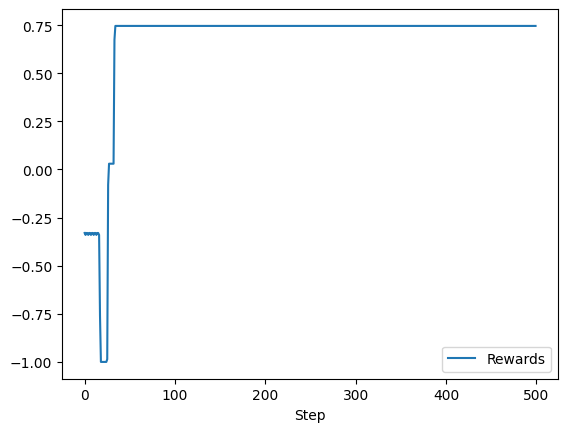

In [13]:
plt.plot(returns, label="Rewards")
plt.xlabel('Step')
plt.legend()
plt.show()

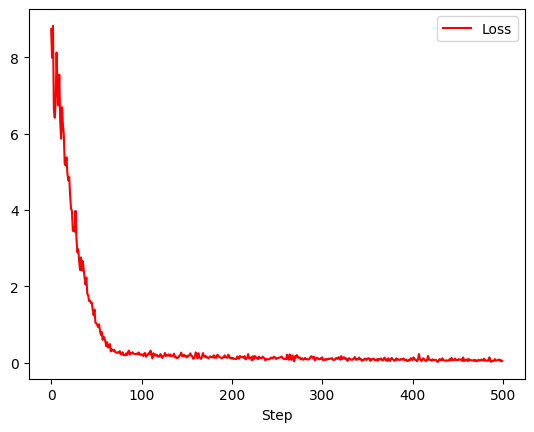

In [12]:
plt.plot(loss, label="Loss", c='r')
# plt.plot(returns, label="Rewards")
plt.xlabel('Step')
plt.legend()
plt.show()

Save to checkpoint.

In [34]:
train_checkpointer.save(global_step)

INFO:absl:Saved checkpoint: tmp/checkpoint/ckpt-15000


### Restore checkpoint

In [29]:
def test(policy, test_env, num_episodes: int=10000):
    rewards = []
    log_interval = 100
    time_step = test_env.reset()
    total_return = 0.0
    for i in tqdm(range(10000)):
        policy_state = policy.action(time_step)
        time_step = test_env.step(policy_state.action)
        reward = time_step.reward.numpy()[0]
        total_return += reward # Calculate a sum of rewards

        if i % log_interval == 0:
            # avg_return = compute_avg_return(eval_env, agent.policy, 10)
            avg_return = total_return / eval_interval
            print('step = {0}: Average reward = {1:.5f}'.format(step, avg_return))
            rewards.append(avg_return)
            total_return = 0.0 # reset
    return rewards

# The whole set of objects should be recreated 
# the same way as when the checkpoint was created.
# train_checkpointer.initialize_or_restore()
# global_step = tf.compat.v1.train.get_global_step()

# Also save policy and export to a location
# tf_policy_saver.save(policy_dir)

# The policy can be loaded without having any knowledge 
# of what agent or network was used to create it. 
# This makes deployment of the policy much easier.
# Load the saved policy and check how it performs.
# saved_policy = tf.saved_model.load(policy_dir)
test(agent.policy, test_env)
# print(reward)

# saved_res = compute_avg_return(eval_env, saved_policy, num_episodes=20)
# random_res = compute_avg_return(eval_env, random_policy, num_episodes=20)

  0%|          | 16/10000 [00:00<01:03, 158.24it/s]

step = 20000: Average reward = 0.00493


  1%|          | 123/10000 [00:00<00:56, 173.69it/s]

step = 20000: Average reward = 0.24630


  2%|▏         | 236/10000 [00:01<00:53, 181.44it/s]

step = 20000: Average reward = 0.24630


  3%|▎         | 331/10000 [00:01<00:52, 184.25it/s]

step = 20000: Average reward = 0.24630


  4%|▍         | 426/10000 [00:02<00:51, 185.28it/s]

step = 20000: Average reward = 0.24630


  5%|▌         | 521/10000 [00:02<00:51, 184.63it/s]

step = 20000: Average reward = 0.24630


  6%|▋         | 635/10000 [00:03<00:50, 185.36it/s]

step = 20000: Average reward = 0.24630


  7%|▋         | 730/10000 [00:04<00:49, 185.43it/s]

step = 20000: Average reward = 0.24630


  8%|▊         | 825/10000 [00:04<00:49, 184.41it/s]

step = 20000: Average reward = 0.24630


  9%|▉         | 920/10000 [00:05<00:49, 185.14it/s]

step = 20000: Average reward = 0.24630


 10%|█         | 1034/10000 [00:05<00:48, 185.02it/s]

step = 20000: Average reward = 0.24630


 11%|█▏        | 1129/10000 [00:06<00:47, 185.40it/s]

step = 20000: Average reward = 0.24630


 12%|█▏        | 1224/10000 [00:06<00:47, 185.04it/s]

step = 20000: Average reward = 0.24630


 13%|█▎        | 1338/10000 [00:07<00:46, 185.41it/s]

step = 20000: Average reward = 0.24630


 14%|█▍        | 1433/10000 [00:07<00:46, 184.49it/s]

step = 20000: Average reward = 0.24630


 15%|█▌        | 1502/10000 [00:08<00:46, 182.73it/s]
/home/vsakovskaya/my-env/lib/python3.9/site-packages/tf_agents/policies/tf_policy.py:253: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if policy_state is ():  # pylint: disable=literal-comparison
/home/vsakovskaya/my-env/lib/python3.9/site-packages/tf_agents/policies/tf_policy.py:315: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if not (policy_state is None or policy_state is () or policy_state is []):  # pylint: disable=literal-comparison
/home/vsakovskaya/my-env/lib/python3.9/site-packages/tf_agents/policies/tf_policy.py:253: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if policy_state is ():  # pylint: disable=literal-comparison
/home/vsakovskaya/my-env/lib/python3.9/site-packages/tf_agents/policies/tf_policy.py:315: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if not (policy_state is None or policy_state is () or policy_state is []):  # pylint: disable=literal-comparison
/home/vsak

step = 20000: Average reward = 0.24630


KeyboardInterrupt: 

## Test agent

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x22788bdaeb0>

In [15]:
# eval_env.reset()

state = np.array([[6423576576, 402653184], 0.00578], dtype=object)
saved_policy[state]
# q_values = saved_policy.

TypeError: '_UserObject' object is not subscriptable

In [11]:
time_step = eval_env.current_time_step['observation']

TypeError: 'method' object is not subscriptable

## Keras-rl2 DQNAgent

In [ ]:
import tensorflow as tf
print(tf.__version__)
from keras import __version__
tf.keras.__version__ = __version__

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam

import matplotlib.pyplot as plt
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.callbacks import ModelIntervalCheckpoint, FileLogger


def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1, 2)))
    model.add(Dense(24, activation='relu', input_shape=states))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    # model.add(Flatten())
    return model
    
def build_callbacks(env_name):
    checkpoint_weights_filename = 'dqn_' + env_name + '_weights_{step}.h5f'
    log_filename = 'dqn_{}_log.json'.format(env_name)
    callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=5000)]
    callbacks += [FileLogger(log_filename, interval=100)]
    return callbacks

def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

LEARNING_RATE = 0.1
GAMMA = 0.9999

callbacks = build_callbacks("gc")

# policy = BoltzmannQPolicy()
policy = EpsGreedyQPolicy()
# memory = SequentialMemory(limit=50000, window_length=1)

# memory can help a model during training
# for this, we only consider a single malware sample (window_length=1) for each "experience"
memory = SequentialMemory(limit=50000, window_length=1)

# DQN agent as described in Mnih (2013) and Mnih (2015).
# http://arxiv.org/pdf/1312.5602.pdf
# http://arxiv.org/abs/1509.06461
dqn = DQNAgent(
    model=model, 
    memory=memory, 
    policy=policy,
    nb_actions=actions, 
    nb_steps_warmup=10, 
    target_model_update=1e-2, 
    batch_size=16,
    gamma=GAMMA
)

# keras-rl allows one to use and built-in keras optimizer
dqn.compile(Adam(lr=LEARNING_RATE), metrics=['mae'])

history = dqn.fit(env, nb_max_episode_steps=100, nb_steps=50000, visualize=False, verbose=1)

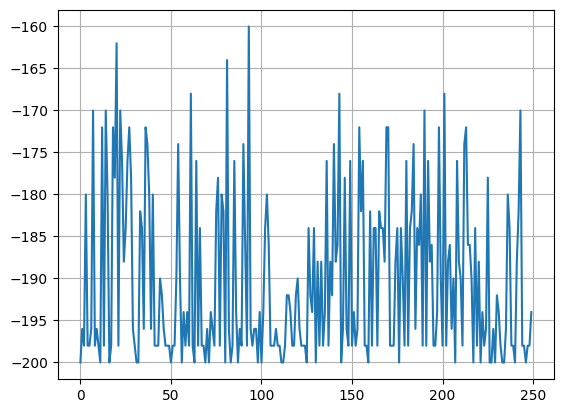

In [ ]:
import matplotlib.pyplot as plt 
plt.grid(True)
plt.plot(history.history['episode_reward'])

In [ ]:
# scores = dqn.test(env, nb_episodes=100, visualize=False)

# scores = dqn.test(
#     env, 
#     nb_episodes=1,
#     visualize=False, 
#     verbose=1
# )

scores = dqn.test(
    env,
    nb_episodes=100,
    action_repetition=1,
    nb_max_episode_steps=200,
    visualize=False,
    verbose=1
)

# print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: -200.000, steps: 200
Episode 2: reward: -198.000, steps: 200
Episode 3: reward: -200.000, steps: 200
Episode 4: reward: -200.000, steps: 200
Episode 5: reward: -196.000, steps: 200
Episode 6: reward: -198.000, steps: 200
Episode 7: reward: -198.000, steps: 200
Episode 8: reward: -200.000, steps: 200
Episode 9: reward: -198.000, steps: 200
Episode 10: reward: -198.000, steps: 200
Episode 11: reward: -196.000, steps: 200
Episode 12: reward: -198.000, steps: 200
Episode 13: reward: -198.000, steps: 200
Episode 14: reward: -198.000, steps: 200
Episode 15: reward: -198.000, steps: 200
Episode 16: reward: -200.000, steps: 200
Episode 17: reward: -200.000, steps: 200
Episode 18: reward: -200.000, steps: 200
Episode 19: reward: -198.000, steps: 200
Episode 20: reward: -200.000, steps: 200
Episode 21: reward: -200.000, steps: 200
Episode 22: reward: -198.000, steps: 200
Episode 23: reward: -198.000, steps: 200
Episode 24: reward: -200.000, steps: 

KeyboardInterrupt: 

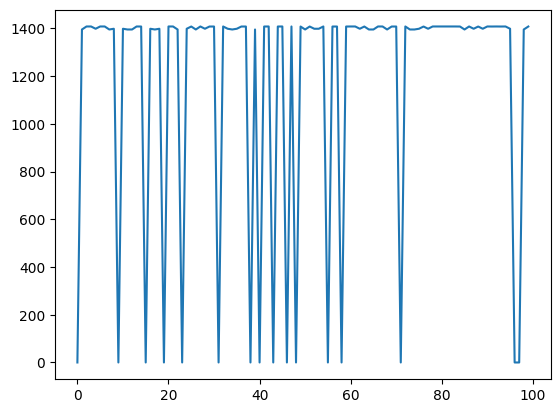

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(scores.history['episode_reward'])

In [ ]:
_ = dqn.test(env, nb_episodes=15, visualize=False)

DONE
{'agent': array([  2., -19.]), 'target': array([  1.99999998, -19.        ])}


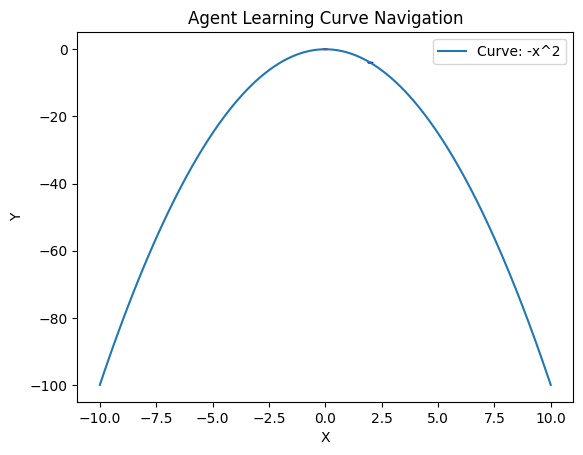

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# from gym.envs.classic_control import rendering
import math

def visualize_learning_realtime(agent, env):
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots()

    x_vals = np.linspace(-10, 10, 400)
    y_vals = [2*math.pow(x, 3) - 3*math.pow(x, 2) - 12 * x + 1 for x in x_vals]
    target_x = 0

    agent_x = env._agent_location[0]

    line, = ax.plot(x_vals, y_vals, label="Curve: -x^2")
    target_circle = plt.Circle((target_x, 0), 0.1, color='red')
    agent_circle = plt.Circle((agent_x, -agent_x ** 2), 0.1, color='blue')

    ax.add_patch(target_circle)
    ax.add_patch(agent_circle)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Agent Learning Curve Navigation')
    ax.legend()

    plt.draw()

    for _ in range(200):
        action = agent.forward(env.observation_space.sample())  # Replace with your agent's action selection
        observation, reward, done, _ = env.step(action)

        agent_x = observation[0]

        agent_circle.center = (agent_x, -agent_x ** 2)
        plt.pause(0.01)
        plt.draw()

        if done:
            env.reset()

    plt.ioff()
    plt.show()

visualize_learning_realtime(dqn, env)

## Save and load

In [ ]:
dqn.save_weights('dqn_weights.h5f', overwrite=True)

In [ ]:
# env = gym.make('CartPole-v0')
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [ ]:
dqn.load_weights('dqn_weights.h5f')

In [ ]:
_ = dqn.test(env, nb_episodes=5, visualize=True)

## Parameters

* ParallelGCThreads: int
* MaxGCPauseMillis: int
* GCTimeRatio: int
* MaxHeapSize: int
* InitialHeapSize: int
* YoungGenerationSizeIncrement: int
* TenuredGenerationSizeIncrement: int
* AdaptiveSizeDecrementScaleFactor: int
* ParallelGCBufferWastePct: int
* ParallelOldDeadWoodLimiterMean: int
* ParallelOldDeadWoodLimiterStdDev: int
* PreTouchParallelChunkSize: int

* UseGCOverheadLimit: bool
* ParallelRefProcBalancingEnabled: bool
* ParallelRefProcEnabled: bool
* AllowParallelDefineClass: bool
* CMSParallelInitialMarkEnabled: bool
* CMSParallelRemarkEnabled: bool
* CMSParallelSurvivorRemarkEnabled: bool
* GCParallelVerificationEnabled: bool